In [1]:
%%html
<style> 
table {display: block;} 
td {
  font-size: 18px
}
.rendered_html { font-size: 28px; }
*{ line-height: 200%; }
</style>

## Natural Language Processing and the Web WS 2022/23 - Practice Class - <span style="color:blue">Tutorial 4</span>

In this practice class, we will discuss different ways of analyzing and visualizing text corpora with different libraries. Before building models for different NLP applications, it is very important to understanding <span style="color:blue">how the corpora looks like</span>.
## Content
* Text <span style="color:blue">concordance</span> and frequency of n-grams
* Introduction to <span style="color:blue">Numpy and Pandas</span>
* Plotting different figures with <span style="color:blue">matplotlib and Seaborn</span>
* Text to <span style="color:blue">vector conversion</span>

## Text Concordance  in NLTK
<span style="color:blue">Concordance</span> finds a word in a text and displays the context in which this word is used. The <span style="color:blue">Concordance</span> function in NLTK takes a word of interest as an input and returns a list of every instance where that word is mentioned in the underlying text. The output includes some snippet words surrounding the target word.

In [2]:
import nltk
contents = open("data/book-excerpts.tab.txt").read()
book_tokens = nltk.word_tokenize(contents)
#nlt.Text performs a variety of analyses on the text's contexts (e.g., counting, 
# concordancing, collocation discovery), and display the results. 
book_text = nltk.Text(book_tokens)
# show all the concordances for the word 'doctor'
book_text.concordance('doctor',lines=-1)

Displaying -1 of 37 matches:
ief for us when the door opened and Doctor Livesey came in on his visit to my 
ame in on his visit to my father Oh doctor we cried what shall we do ? Where i
 ? A fiddle-stick 's end ! said the doctor No more wounded than you or I The m
 When I got back with the basin the doctor had already ripped up the captain '
ith great spirit Prophetic said the doctor touching this picture with his fing
y about him First he recognized the doctor with an unmistakable frown ; then h
There is no Black Dog here said the doctor except what you have on your own ba
nterrupted Much I care returned the doctor It 's the name of a buccaneer of my
most fainting Now mind you said the doctor I clear my conscience -- the name o
ved rough and I 'll raise Cain Your doctor hisself said one glass would n't hu
et ; besides I was reassured by the doctor 's words now quoted to me and rathe
 sure enough And now matey did that doctor say how long I was to lie here in t
a sitting position on t

In [3]:
# using the Moby Dick text from the NLTK books 
from nltk.book import *
text1.concordance('frightened')

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
Displaying 6 of 6 matches:
t , and was fast asleep . But the frightened master comes to him , and shrieks
nd never came to good . He got so frightened about his plaguy soul , that he s
 says he . Slid ! man , but I was frightened . Such a phiz ! But , somehow , n
aking of that buffalo robe to the frightened colt ! Though neither knows where
ndostan coast with a deck load of frightened horses , careens , buries , rolls
st - sou - east , sir ," said the frightened steersman . " Thou

In [4]:
# Get the individual lines of the concordance for further processing
def get_concordance_text(word, text, left_margin = 5, right_margin = 5):
    tokens = nltk.word_tokenize(text)
    text = nltk.Text(tokens)
    # indexes of the tokens
    indices = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
    concordance_txt = ([text.tokens[offset-left_margin:offset+right_margin] # some tokens around target
                        for offset in indices.offsets(word)])                   
    return [''.join([snippet+' ' for snippet in concordances]) for concordances in concordance_txt]

results = get_concordance_text('doctor', contents)
print(len(results))
for result in results:
    print (result)

37
when the door opened and Doctor Livesey came in on 
visit to my father Oh doctor we cried what shall 
's end ! said the doctor No more wounded than 
back with the basin the doctor had already ripped up 
great spirit Prophetic said the doctor touching this picture with 
him First he recognized the doctor with an unmistakable frown 
Black Dog here said the doctor except what you have 
Much I care returned the doctor It 's the name 
Now mind you said the doctor I clear my conscience 
I 'll raise Cain Your doctor hisself said one glass 
I was reassured by the doctor 's words now quoted 
And now matey did that doctor say how long I 
position on the edge That doctor 's done me he 
! -- to that eternal doctor swab and tell him 
the whole story to the doctor for I was in 
death for him and the doctor was suddenly taken up 
at once and ride for Doctor Livesey would have left 
to ride forward to the doctor 's in search of 
Good evening Dance says the doctor with a nod And 
about the room and 

# <span style="color:blue">Frequencies distribution</span>
Show the number of times <span style="color:blue">each unique</span> word is used in a text. This helps us to understand the <span style="color:blue">topic</span> in the text and how they are discussed.


In [5]:
fdist = FreqDist(book_tokens)
# count unique words
count = len(fdist)
count

12061

In [6]:
#print most common 100 words
fdist.most_common (100)

[('the', 6711),
 ('and', 4461),
 ('of', 3293),
 ('to', 3179),
 ('I', 3102),
 ('a', 2754),
 ('in', 1901),
 ('was', 1592),
 ('that', 1460),
 ('it', 1280),
 ('her', 1099),
 ('with', 1091),
 ('you', 1023),
 ('as', 1018),
 ('he', 1006),
 ('had', 921),
 ('said', 845),
 ('for', 813),
 ('my', 810),
 ('she', 805),
 ('his', 775),
 ('on', 761),
 (';', 750),
 ('not', 728),
 ('at', 714),
 ("'s", 709),
 ('is', 707),
 ('me', 698),
 ('but', 599),
 ('be', 599),
 ('?', 574),
 ('--', 566),
 ('!', 565),
 ('were', 559),
 ("n't", 537),
 ('all', 515),
 ('have', 515),
 ('The', 473),
 ('they', 461),
 ('so', 460),
 ('by', 448),
 ('from', 447),
 ('which', 432),
 ('him', 425),
 ('do', 412),
 ('one', 394),
 ('we', 379),
 ('them', 370),
 ('this', 369),
 ('there', 354),
 ('or', 350),
 ('out', 343),
 ('little', 338),
 ('are', 335),
 ('up', 332),
 ('if', 320),
 ('their', 296),
 ('could', 295),
 ('an', 289),
 ("'", 289),
 ('would', 287),
 ('into', 286),
 ('It', 280),
 ('when', 279),
 ('like', 276),
 ('no', 275),
 ('wil

In [7]:
#proportions of the 50 most common words in the book_sample corpus
print (sum(common[1] for common in fdist.most_common (50))/len(book_tokens)*100)

42.5002490593221


In [8]:
# show words that occur only once (hapaxes)
fdist.hapaxes()

['Category',
 'Text',
 'include=True',
 'unsteadied',
 'fouled',
 'fighting',
 'deary',
 'death-hurt',
 'scuffle',
 'Wounded',
 'fiddle-stick',
 'trebly',
 'worthless',
 'tattooed',
 'executed',
 'forearm',
 'Prophetic',
 'lancet',
 'mistily',
 'unmistakable',
 'headforemost',
 'Much',
 'shortness',
 'hoist',
 'fainting',
 'Spot',
 'ABOUT',
 'hisself',
 'guinea',
 'noggin',
 'bribe',
 'greedily',
 'Thunder',
 'seamanly',
 'reef',
 'daddle',
 'Lay',
 'HE',
 'sea-chest',
 'swab',
 'magistrates',
 'sich',
 'Savannah',
 'a-dying',
 'peach',
 'weather-eye',
 'equals',
 'swoon-like',
 'confessions',
 'meals',
 'scowling',
 'shocking',
 'sea-song',
 'regain',
 'confidences',
 'flighty',
 'bodily',
 'love-song',
 'foggy',
 'sneered',
 'cowed',
 'dazed',
 'Lead',
 "'Here",
 'Business',
 'Boy',
 'nimbleness',
 'skipped',
 'tap-tap-tapping',
 'released',
 'Six',
 'thundering',
 'apoplexy',
 'Sea-chest',
 'LOST',
 'shipmates',
 'booty',
 'payment',
 'debts',
 'ticking',
 'alarms',
 'haunted',
 'ho

In [9]:
# print the percentage of hapaxes
print(len(fdist.hapaxes())/len(set(book_tokens))*100)

50.186551695547635


In [10]:
nltk.download('stopwords')
#remove stopwords
from nltk.corpus import stopwords
en_stopws = stopwords.words('english')
# remove stop words and punctuation marks
book_tokens_filtered = [t.lower() for t in book_tokens if t.lower() not in en_stopws and t.isalpha()]
fdist = FreqDist(book_tokens_filtered)
#print most common 100 words
fdist.most_common (100)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silasueberschaer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('said', 846),
 ('one', 429),
 ('little', 340),
 ('could', 300),
 ('would', 295),
 ('like', 277),
 ('time', 250),
 ('know', 228),
 ('see', 207),
 ('man', 203),
 ('came', 184),
 ('us', 179),
 ('must', 177),
 ('eyes', 176),
 ('old', 167),
 ('great', 164),
 ('go', 164),
 ('saw', 164),
 ('well', 163),
 ('went', 161),
 ('oh', 155),
 ('way', 153),
 ('come', 150),
 ('seemed', 150),
 ('never', 150),
 ('back', 149),
 ('upon', 148),
 ('people', 146),
 ('long', 145),
 ('think', 144),
 ('face', 141),
 ('make', 141),
 ('made', 141),
 ('asked', 138),
 ('hand', 137),
 ('things', 136),
 ('house', 135),
 ('polly', 134),
 ('much', 133),
 ('sara', 133),
 ('looked', 129),
 ('head', 128),
 ('first', 128),
 ('say', 124),
 ('began', 121),
 ('may', 121),
 ('two', 120),
 ('get', 116),
 ('thought', 116),
 ('away', 114),
 ('heard', 114),
 ('mr', 114),
 ('phronsie', 114),
 ('still', 112),
 ('good', 112),
 ('tell', 111),
 ('girl', 111),
 ('got', 110),
 ('miss', 108),
 ('going', 107),
 ('children', 104),
 ('might'

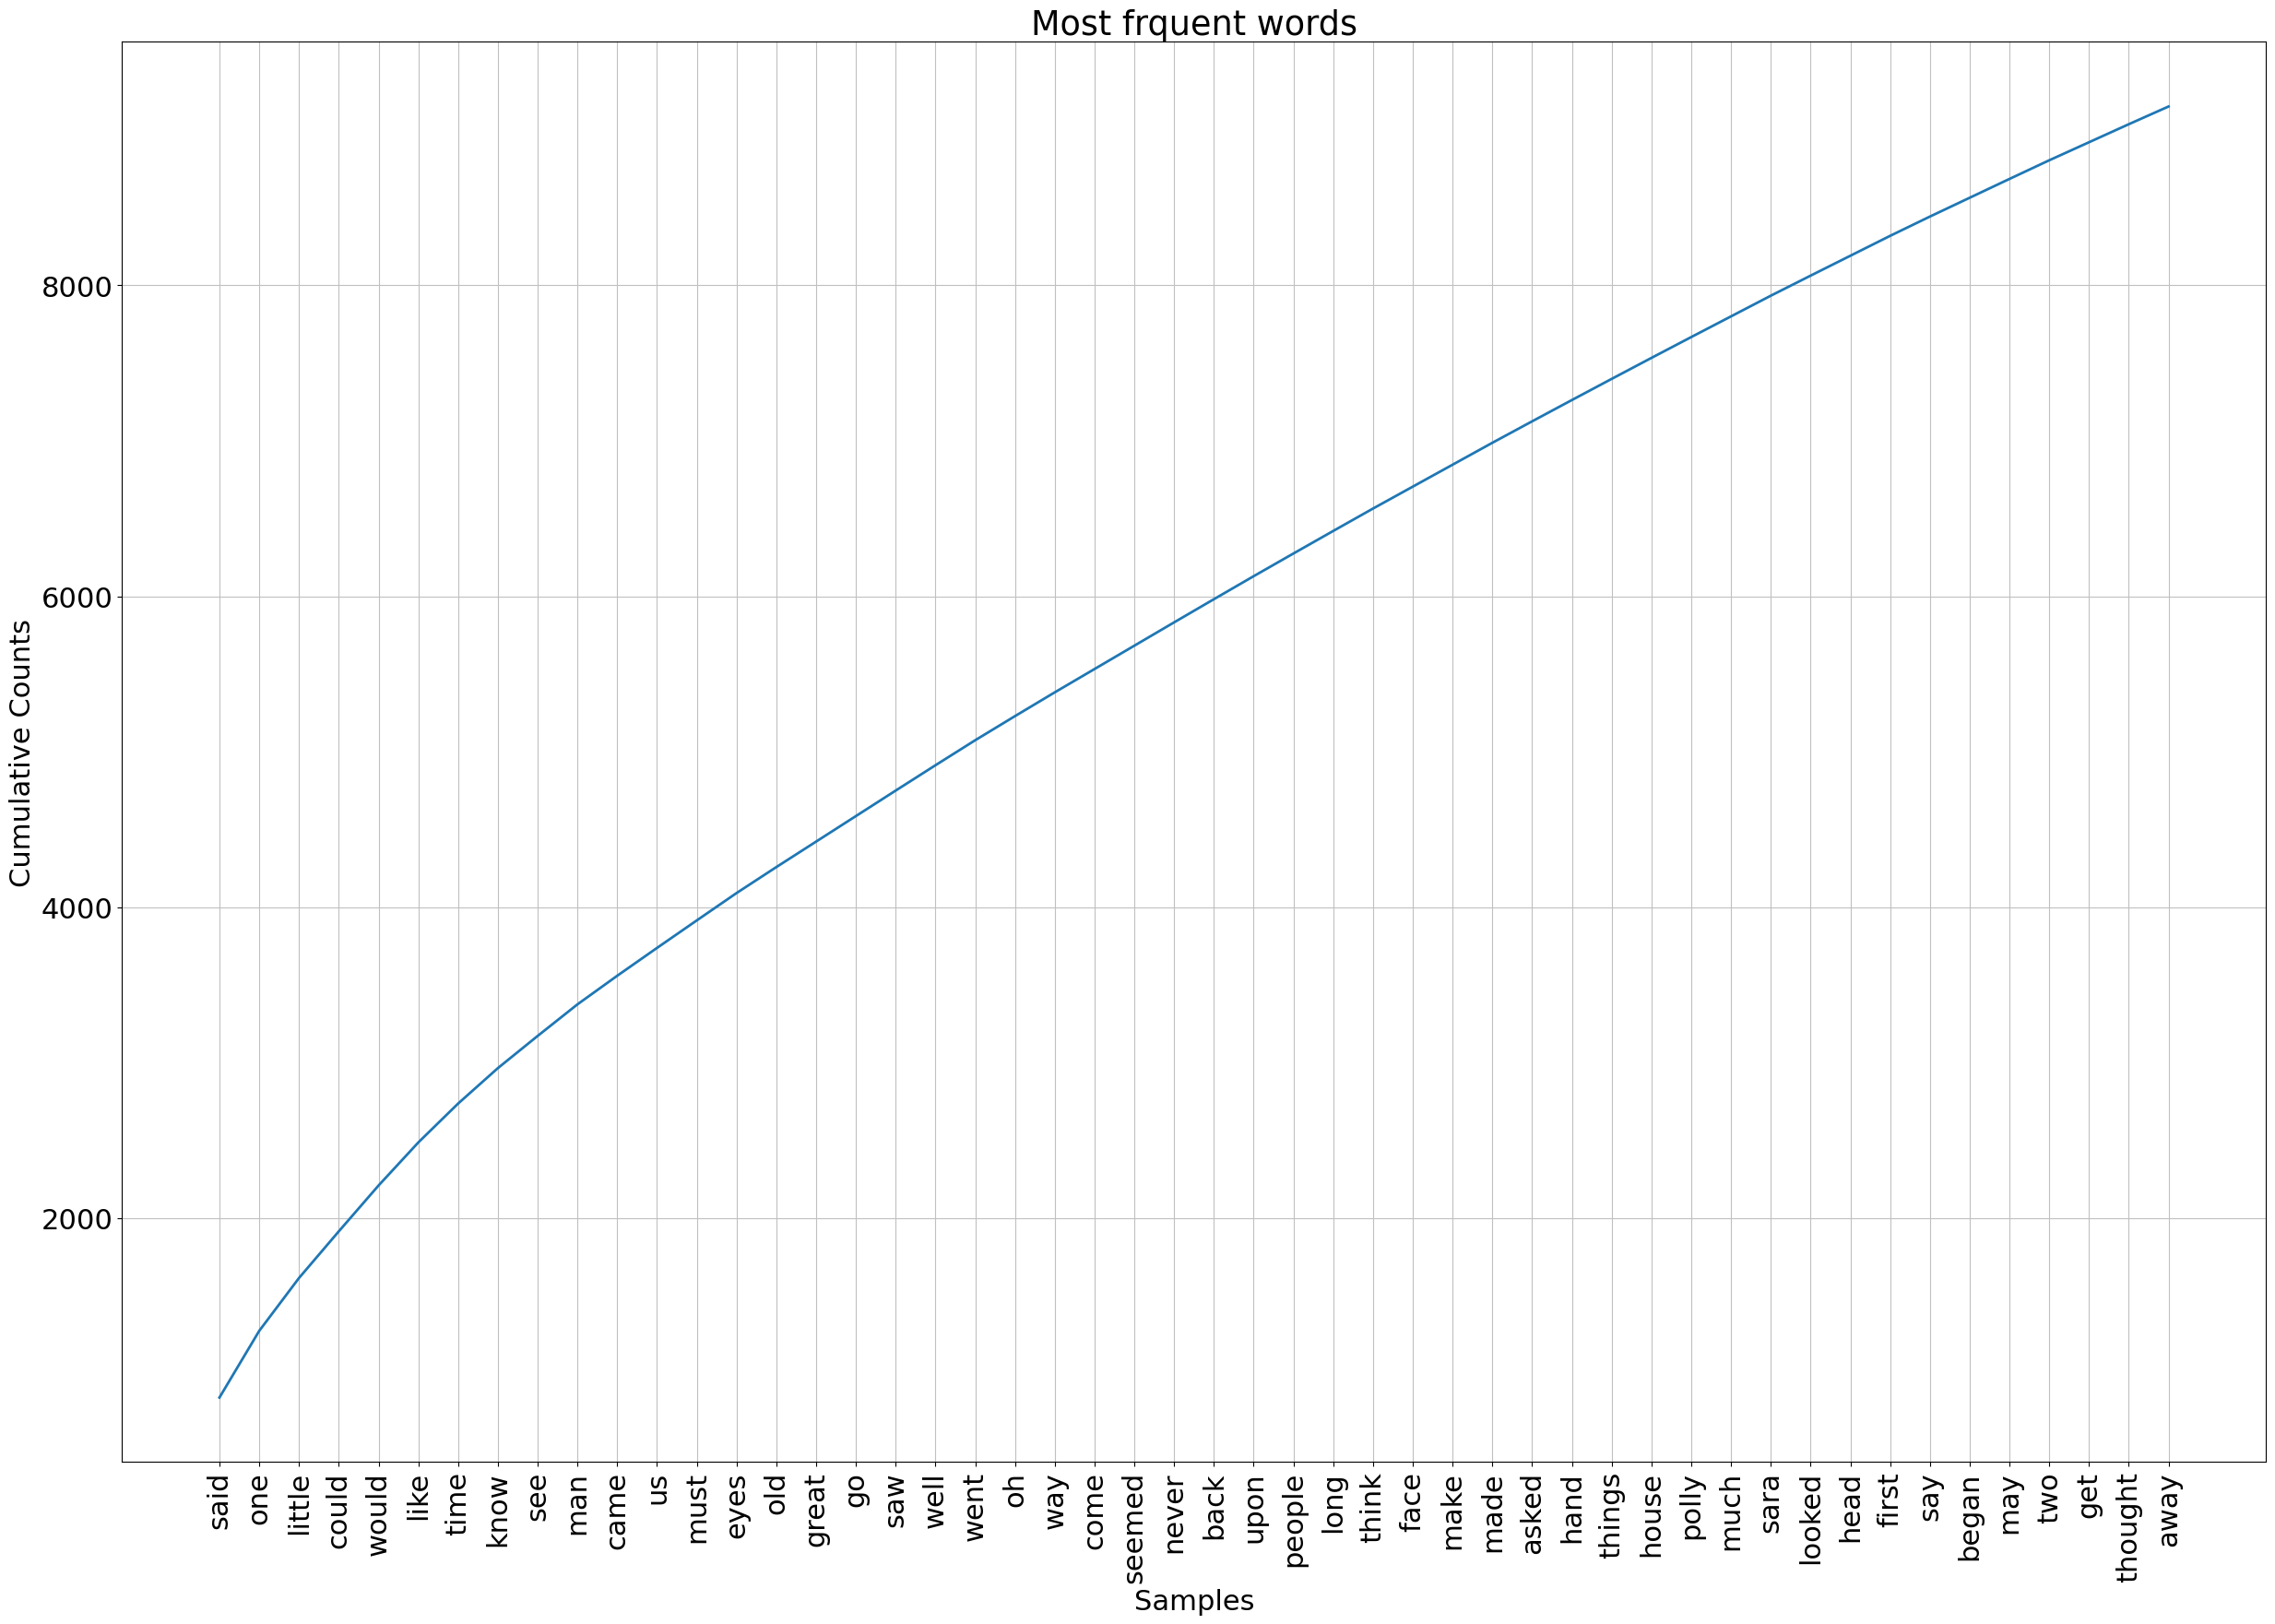

<AxesSubplot:title={'center':'Most frquent words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20)) 
plt.rcParams.update({'font.size': 22})
# show the cumulative frequencies of the top 50 common words
fdist.plot( 50,title="Most frquent words", cumulative=True)

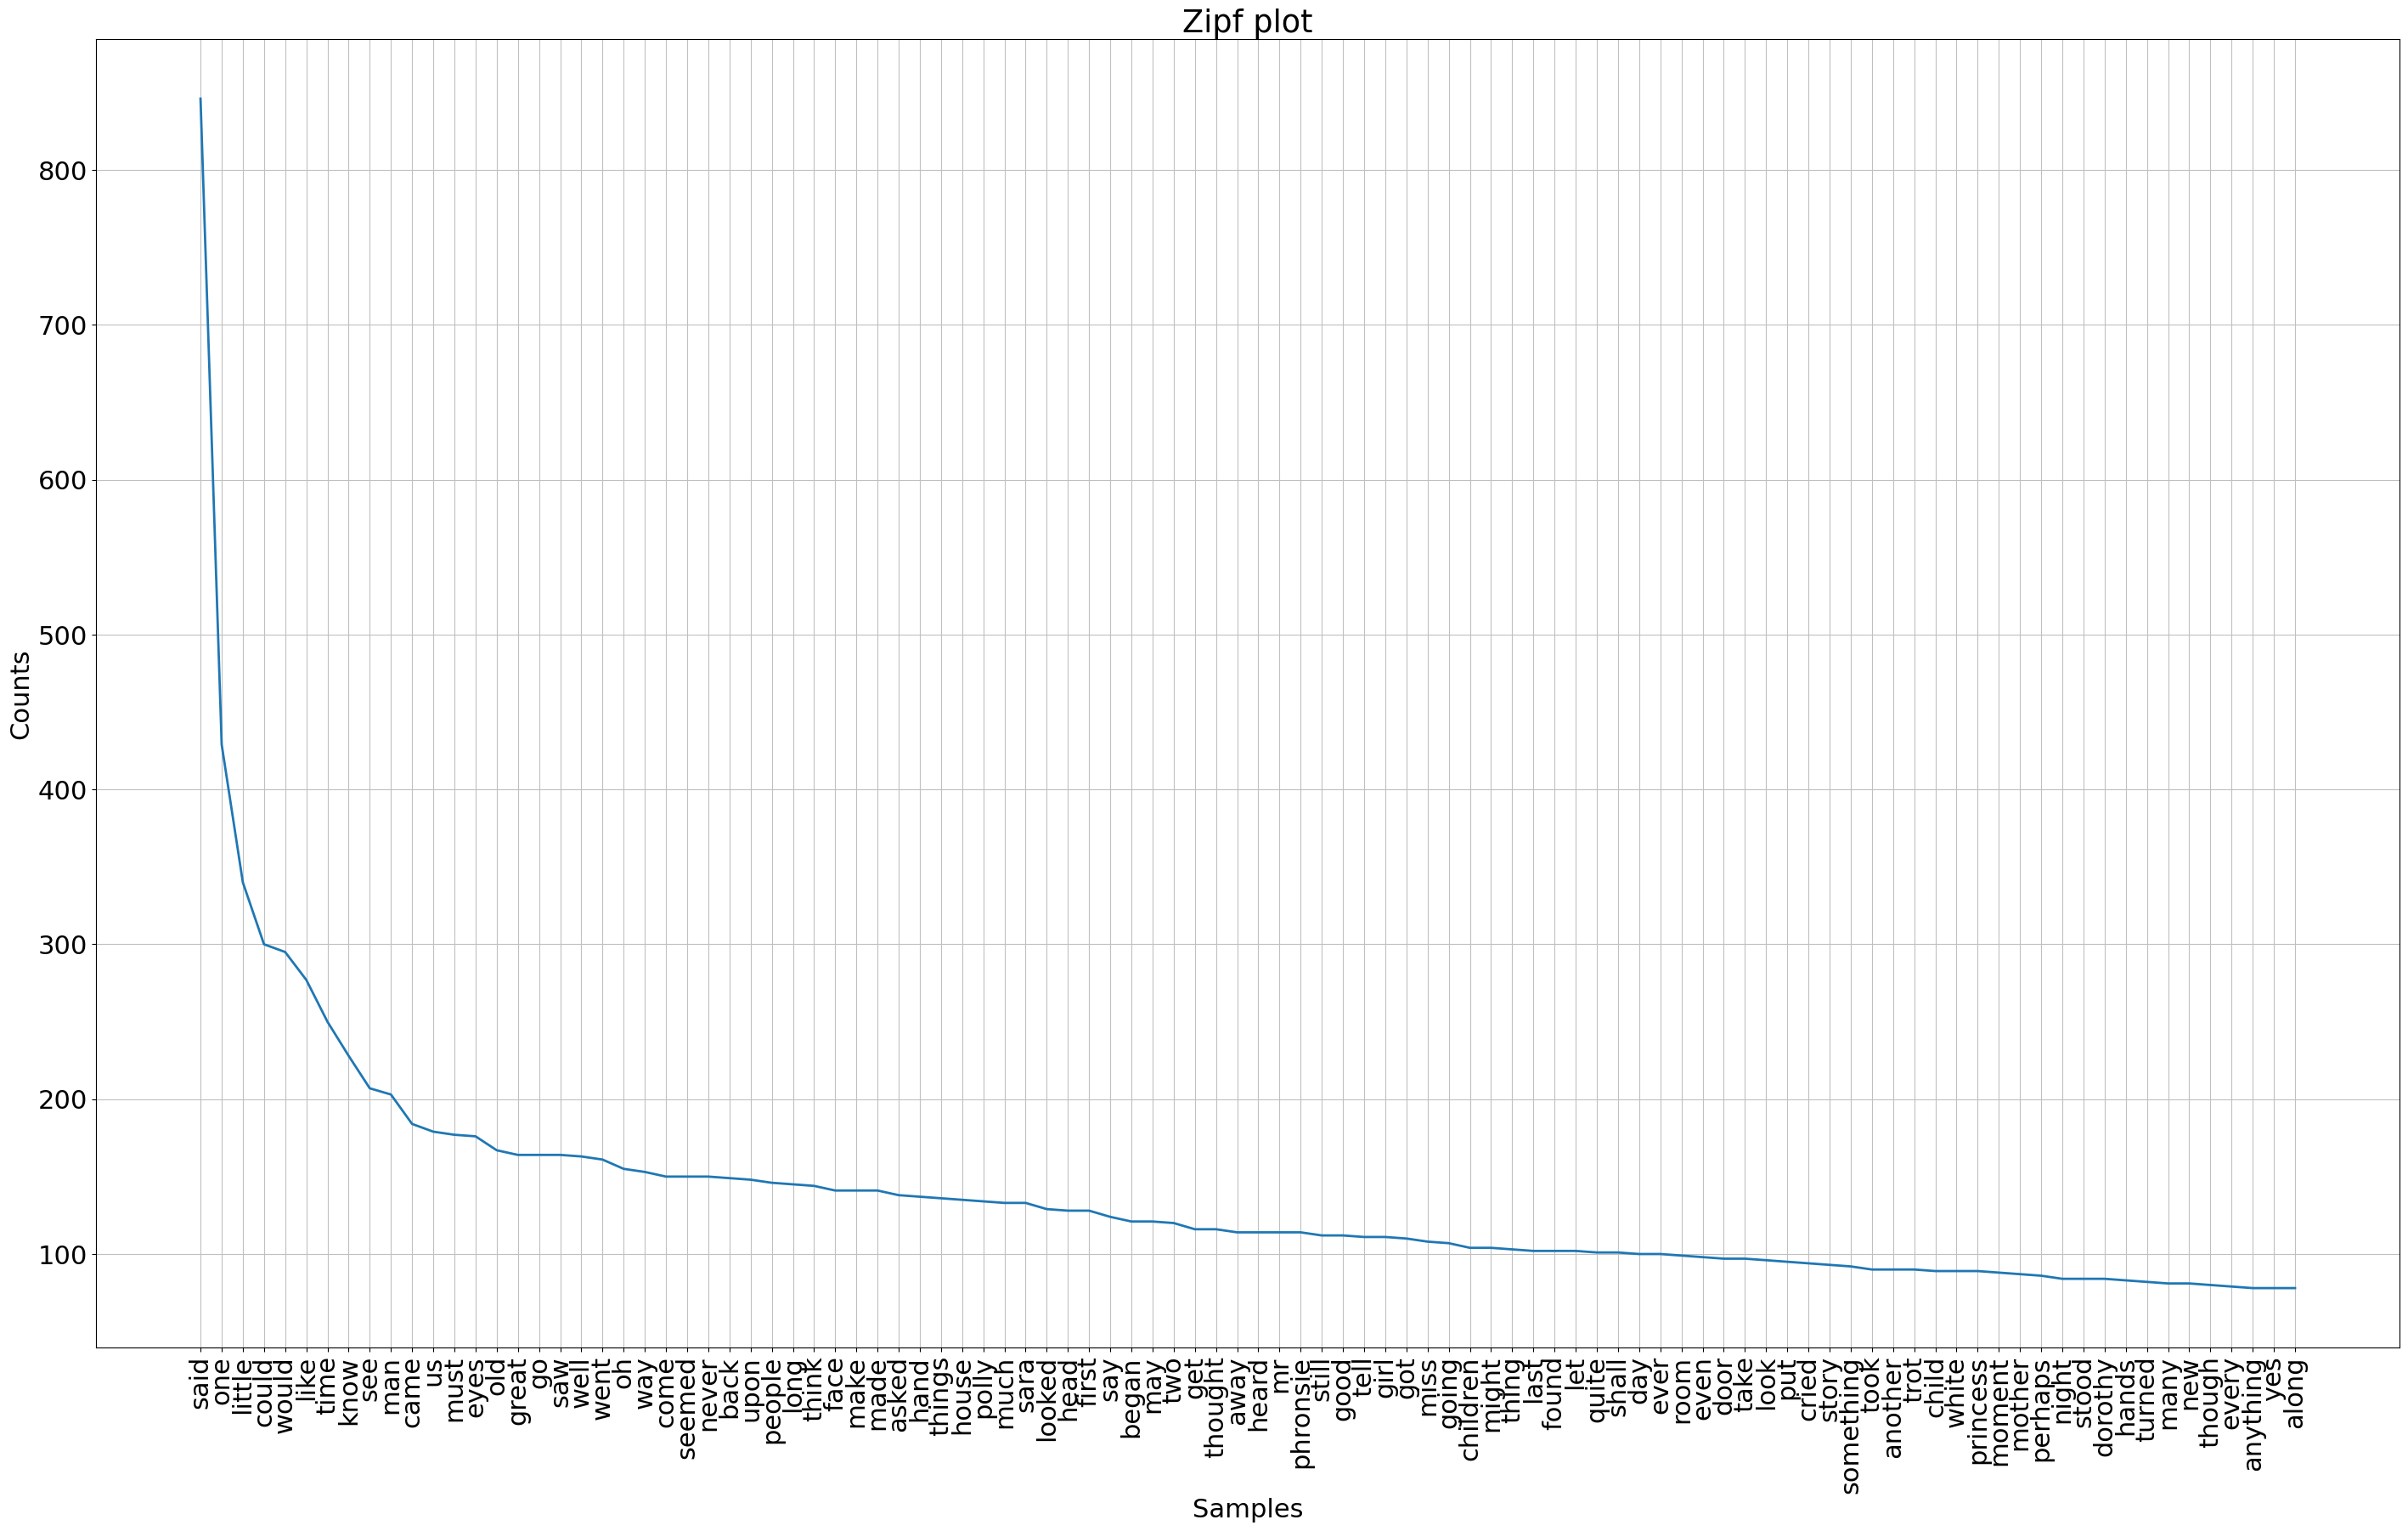

<AxesSubplot:title={'center':'Zipf plot'}, xlabel='Samples', ylabel='Counts'>

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35, 20)) 
plt.rcParams.update({'font.size': 22})
# plot the zipf plot for the most 100 words 
fdist.plot(100,title="Zipf plot",)

## <span style="color:blue">Conditional Freq Dist</span>
A collection of frequency distributions for a single experiment run under <span style="color:blue">different conditions</span>. Conditional frequency distributions are used to record the <span style="color:blue">number of times each sample occurred</span>, given the condition under which the experiment was run.

In [13]:
# collection of inagural speech, YEAR-PRESIDENT_NAME format
from nltk.corpus import inaugural
for fileid in inaugural.fileids():
    print ("Speach name:->", fileid)
    print ("The year part:->", fileid[:4])
    break # just show the first entry
    

Speach name:-> 1789-Washington.txt
The year part:-> 1789


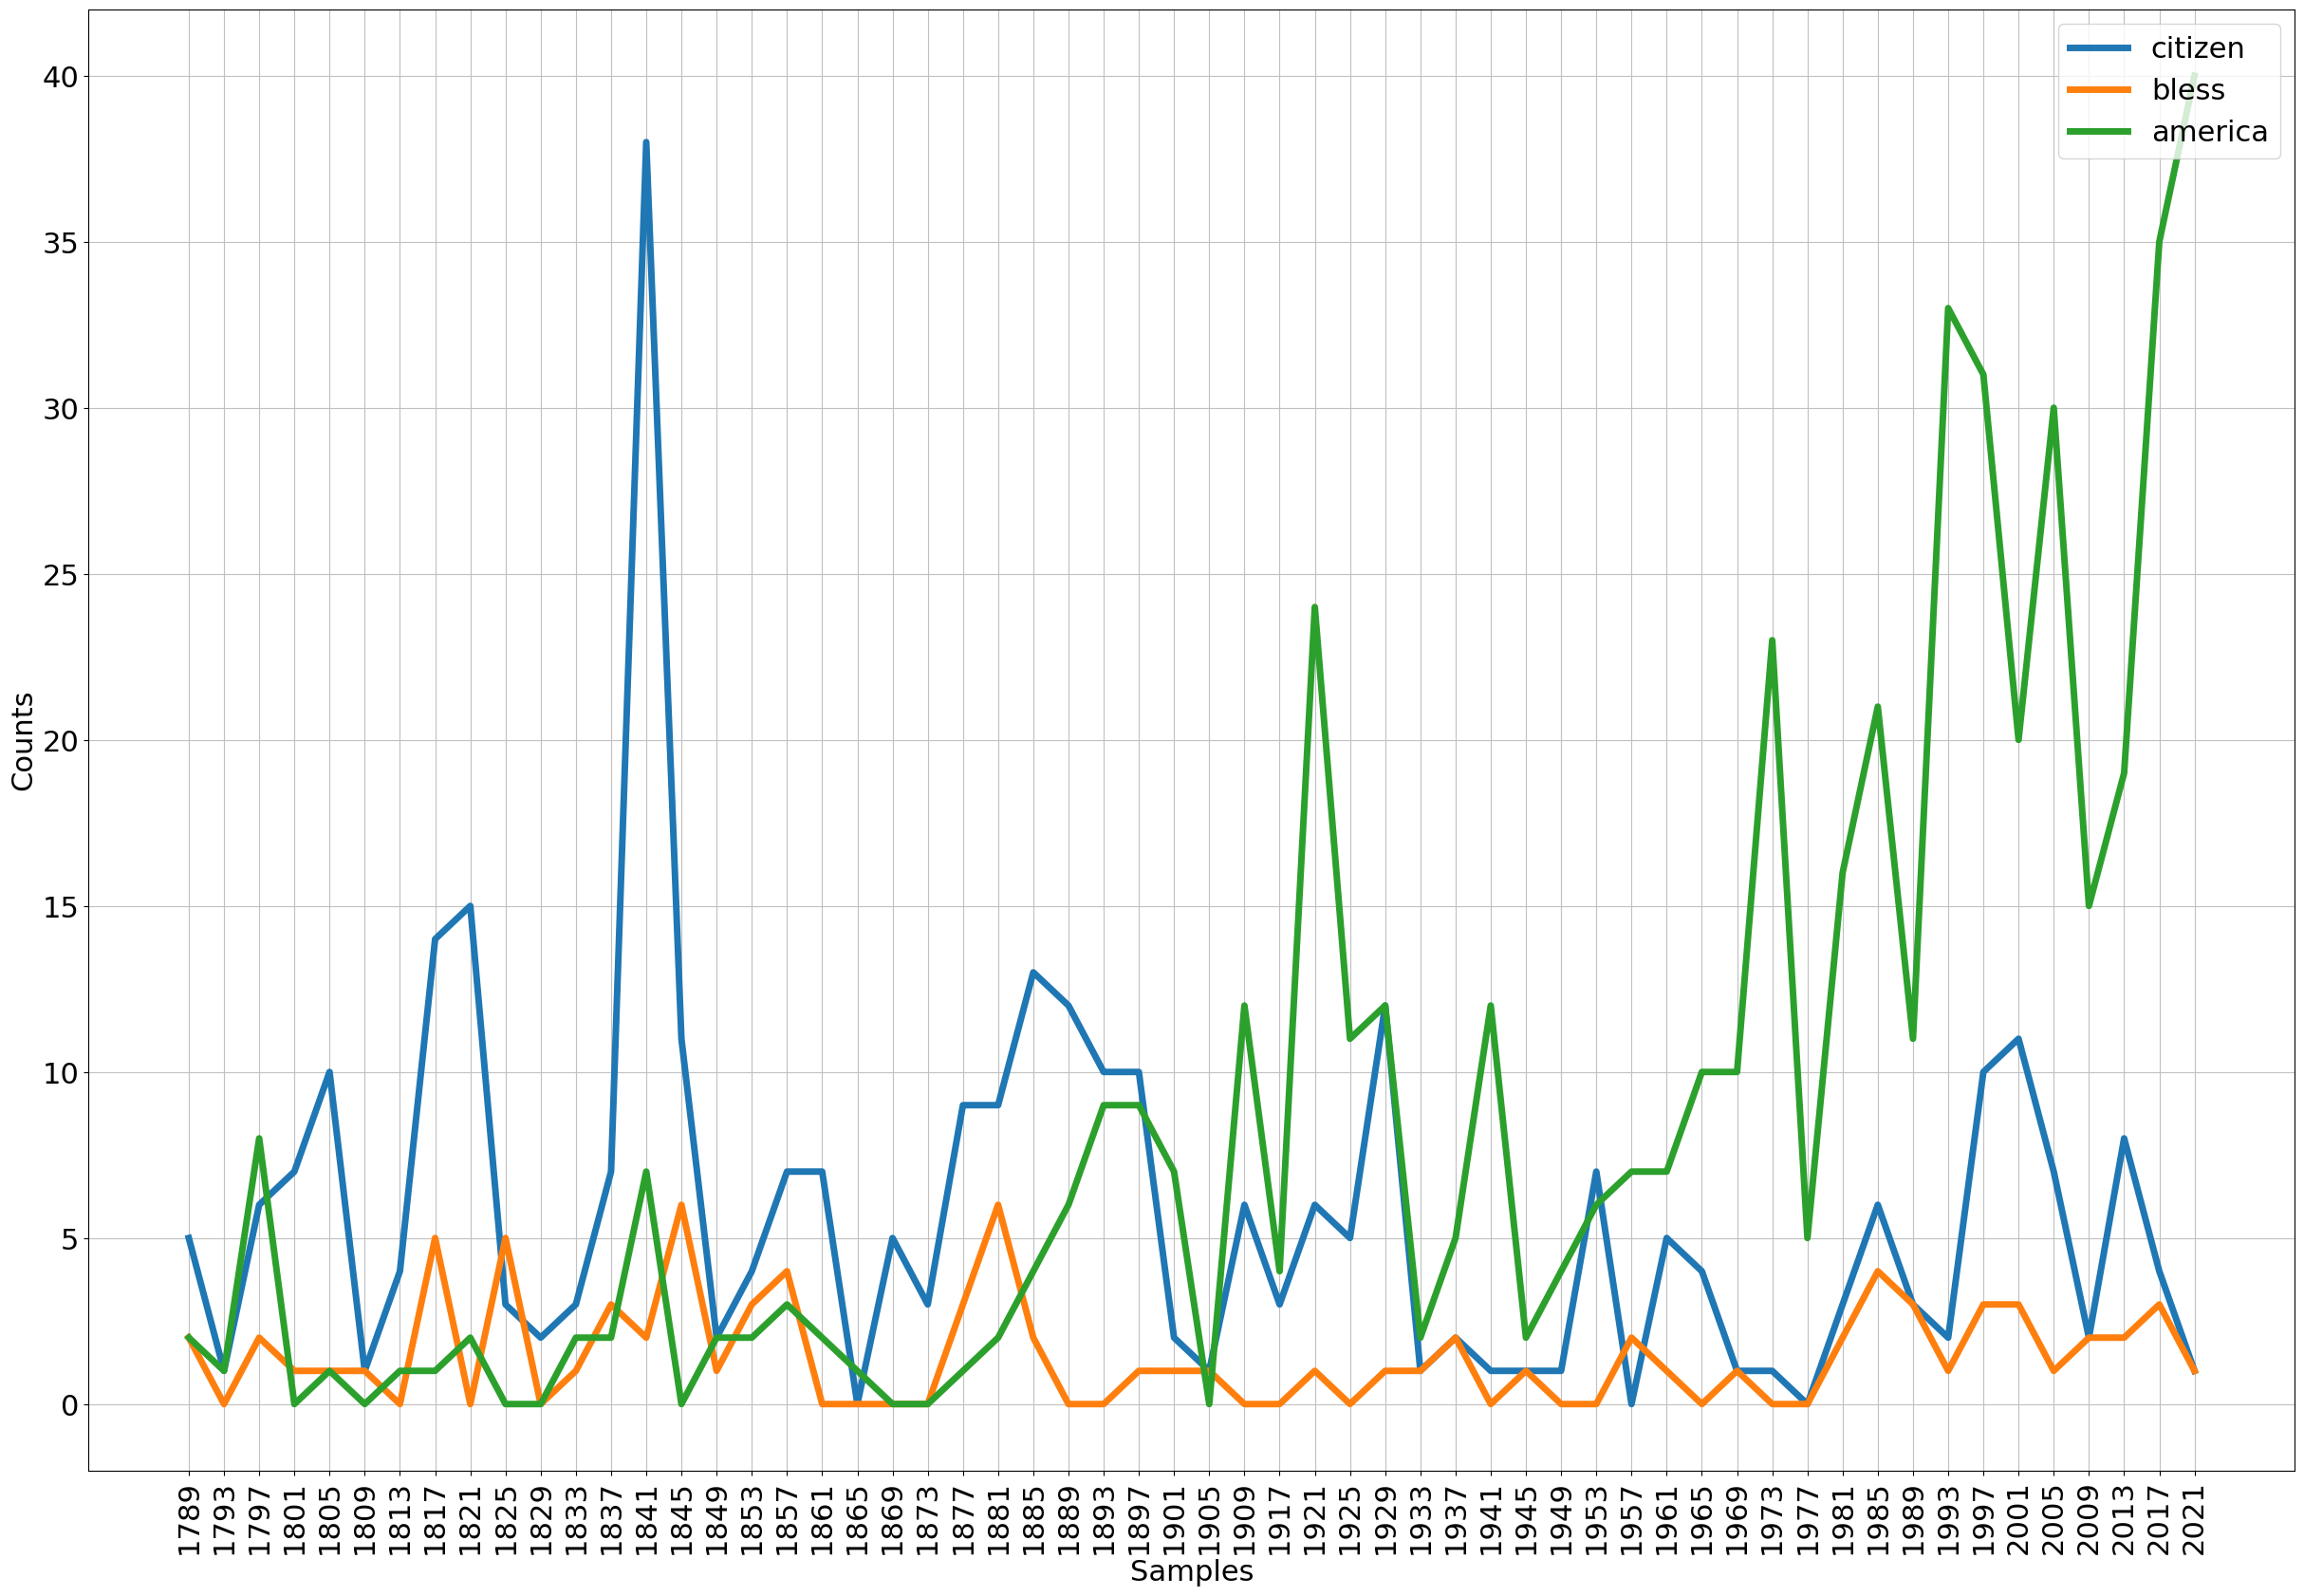

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
#ploting conditional frequencies
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
cfd = nltk.ConditionalFreqDist(
          (target, fileid[:4])
          for fileid in inaugural.fileids()
            for w in inaugural.words(fileid)
          for target in ['america', 'citizen','bless']
          if w.lower().startswith(target)) 
cfd.plot(linewidth=5)

## <span style="color:blue">N-grams</span> 
Word frequencies give a hint about the corpus you are dealing with. Moreover, you can analyze the n-grams, the <span style="color:blue">sequence of <span style="color:blue">N</span> words</span>, that will give hints on which word often <span style="color:blue">occur together</span>. This concepts are basics for a number of tasks such as computing text similarity, identifying chunks or noun phrases, disambiguating named entities and so on. N-grams are also very important build language models, which known as <span style="color:blue">N-gram model</span>.

In [15]:
# read a text from a file
import os
content = open("data/ing.txt").read()
#Split words using whitespace
words = content.split()
# Count the frequencies of each word from the list
frequencies = [words.count(word) for word in words]
# show the frequencies of each word (set --> removes duplicates)
for key, val in set(zip(words,frequencies)):
    print (key, val)

controlled 1
2017 1
god 1
defended 1
They 1
future. 1
by 6
Together 1
conviction, 1
rebuild 1
longer. 1
Donald 2
buy 1
system 1
serve 1
inauguration 1
bedrock 1
products, 1
Trump's 1
deprived 1
exists 1
freedoms, 1
city 1
children 1
again, 2
always 2
industry, 1
Obama 2
bigger. 1
changes, 1
Together, 1
aid 1
men 2
heal 1
disease 1
that 9
We 27
knowledge, 1
dollars 1
space, 1
poverty 1
God's 1
Now 1
Politicians 1
urban 1
sprawl 1
group 1
my 1
wealth, 2
sky, 1
right 5
put 1
day 3
There 1
sights 1
share 2
very 2
sad 1
hall 1
borders. 1
decree 1
trapped 1
victories 1
matters 1
be 13
large, 1
glorious 2
ripped 1
hour 1
government 1
Trump’s 1
lift 1
decision 1
room 1
Americans. 1
labor. 1
on 6
prejudice. 1
plains 1
families, 1
but 12
prospered, 1
stealing 1
how 1
good 2
workers 2
longer 1
seen 1
pride 1
truly 1
will 43
breath 2
were 1
start 1
bless 3
here 4
protected 3
remember 1
eradicate 1
over. 1
bleed 1
harness 1
depletion 1
historic 1
Finally, 1
Earth 1
airports 1
blood 1
guide 1
own 1


In [16]:
#let's create a method to build a dictionary of words to frequencies from the word lists
def freqDict(words):
    frequencies = [words.count(word) for word in words]
    return dict( zip(words,frequencies))

# Lets sort the dictionary based on words' frequency, the most frequent at the top
def sortDict(freqdict):
    sorteddict = [(freqdict[key], key) for key in freqdict]
    sorteddict.sort()
    sorteddict.reverse()
    return sorteddict

freqdict = freqDict(words)
for word in sortDict(freqdict):
    print (word[1], word[0])

and 71
the 67
our 48
of 48
will 43
to 37
We 27
we 21
is 20
all 14
a 14
in 13
for 13
be 13
from 12
but 12
are 12
America 11
your 10
not 10
that 9
American 9
with 8
their 8
people 7
it 7
you. 6
you 6
while 6
this 6
one 6
on 6
new 6
make 6
has 6
great 6
by 6
back 6
again. 6
across 6
The 6
And 6
same 5
right 5
no 5
never 5
have 5
every 5
country 5
President 5
which 4
they 4
other 4
or 4
nation 4
many 4
here 4
dreams 4
bring 4
been 4
at 4
as 4
America. 4
America, 4
world, 3
whether 3
too 3
protected 3
people. 3
only 3
nation's 3
must 3
millions 3
left 3
its 3
heart 3
foreign 3
first. 3
everyone 3
day 3
citizens 3
bless 3
an 3
This 3
Their 3
Thank 3
I 3
world 2
workers 2
women 2
winning 2
wealth, 2
very 2
trillions 2
transferring 2
today, 2
today 2
time 2
these 2
there 2
talk 2
stops 2
so 2
small 2
shine 2
share 2
seek 2
safe 2
righteous 2
power, 2
power 2
party 2
out 2
old 2
oath 2
now. 2
now 2
nations 2
national 2
moment 2
men 2
made 2
loyalty 2
like 2
life 2
let 2
jobs. 2
jobs 2
governmen

In [17]:
# remove stop words, lowercase the text
stopwords = ["the", "a", "no", "other", "we", "and", "of","will","is","in","our","to","you","for"]
def removeStopWords(words, stopwords):
    return [word.lower() for word in words if word.lower() not in stopwords]
cleanwords = removeStopWords(words, stopwords)
freqdict = freqDict(cleanwords)
for word in sortDict(freqdict):
    print (word[1], word[0])

all 14
but 13
be 13
from 12
are 12
your 11
their 11
america 11
that 10
not 10
this 9
american 9
with 8
it 8
people 7
one 7
every 7
you. 6
while 6
on 6
new 6
make 6
has 6
great 6
by 6
back 6
at 6
again. 6
across 6
they 5
same 5
right 5
president 5
never 5
have 5
country 5
which 4
thank 4
or 4
nation 4
many 4
here 4
everyone 4
dreams 4
bring 4
been 4
as 4
america. 4
america, 4
world, 3
whether 3
when 3
we've 3
too 3
these 3
there 3
so 3
protected 3
people. 3
only 3
now 3
nation's 3
must 3
millions 3
left 3
its 3
i 3
heart 3
god 3
foreign 3
first. 3
do 3
day 3
citizens 3
bless 3
an 3
world 2
workers 2
women 2
winning 2
wealth, 2
very 2
united 2
trillions 2
transferring 2
together, 2
together 2
today, 2
today 2
time 2
talk 2
stops 2
states 2
small 2
shine 2
share 2
seek 2
safe 2
righteous 2
power, 2
power 2
politicians 2
party 2
out 2
old 2
obama 2
oath 2
now. 2
nations 2
national 2
moment 2
men 2
made 2
loyalty 2
live 2
like 2
life 2
let 2
jobs. 2
jobs 2
it's 2
government, 2
good 2
glorio

In [18]:
# see the contents
content

"Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world, thank you. We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together we will determine the course of America, and the world, for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done.\n\n\nEvery four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.\n\nToday's ceremony, however, has very special meaning, because today we are not merely transferring power from one administration to another, or from one party to another, but we are transferring power from Washington, D.C., and giving it back to you, the people.\n\nFor

In [19]:
# and list of words
words = [word for word in content.lower().split(" ") if word != ""]
words

['chief',
 'justice',
 'roberts,',
 'president',
 'carter,',
 'president',
 'clinton,',
 'president',
 'bush,',
 'president',
 'obama,',
 'fellow',
 'americans,',
 'and',
 'people',
 'of',
 'the',
 'world,',
 'thank',
 'you.',
 'we',
 'the',
 'citizens',
 'of',
 'america',
 'are',
 'now',
 'joined',
 'in',
 'a',
 'great',
 'national',
 'effort',
 'to',
 'rebuild',
 'our',
 'country',
 'and',
 'restore',
 'its',
 'promise',
 'for',
 'all',
 'of',
 'our',
 'people.',
 'together',
 'we',
 'will',
 'determine',
 'the',
 'course',
 'of',
 'america,',
 'and',
 'the',
 'world,',
 'for',
 'many,',
 'many',
 'years',
 'to',
 'come.',
 'we',
 'will',
 'face',
 'challenges.',
 'we',
 'will',
 'confront',
 'hardships,',
 'but',
 'we',
 'will',
 'get',
 'the',
 'job',
 'done.\n\n\nevery',
 'four',
 'years,',
 'we',
 'gather',
 'on',
 'these',
 'steps',
 'to',
 'carry',
 'out',
 'the',
 'orderly',
 'and',
 'peaceful',
 'transfer',
 'of',
 'power,',
 'and',
 'we',
 'are',
 'grateful',
 'to',
 'presid

In [20]:
# and n grams of size 2
ngrams = zip(*[words[i:] for i in range(2)])
[" ".join(ngram) for ngram in ngrams]

['chief justice',
 'justice roberts,',
 'roberts, president',
 'president carter,',
 'carter, president',
 'president clinton,',
 'clinton, president',
 'president bush,',
 'bush, president',
 'president obama,',
 'obama, fellow',
 'fellow americans,',
 'americans, and',
 'and people',
 'people of',
 'of the',
 'the world,',
 'world, thank',
 'thank you.',
 'you. we',
 'we the',
 'the citizens',
 'citizens of',
 'of america',
 'america are',
 'are now',
 'now joined',
 'joined in',
 'in a',
 'a great',
 'great national',
 'national effort',
 'effort to',
 'to rebuild',
 'rebuild our',
 'our country',
 'country and',
 'and restore',
 'restore its',
 'its promise',
 'promise for',
 'for all',
 'all of',
 'of our',
 'our people.',
 'people. together',
 'together we',
 'we will',
 'will determine',
 'determine the',
 'the course',
 'course of',
 'of america,',
 'america, and',
 'and the',
 'the world,',
 'world, for',
 'for many,',
 'many, many',
 'many years',
 'years to',
 'to come.',
 '

In [21]:
# put all together - generate n-grams from texts, here n = 4
def getNgrams(text, n):
    # lowercase the text
    text = text.lower()
    # create words from the text
    words = [word for word in text.split(" ") if word != ""]
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]
getNgrams(content, 4)

['chief justice roberts, president',
 'justice roberts, president carter,',
 'roberts, president carter, president',
 'president carter, president clinton,',
 'carter, president clinton, president',
 'president clinton, president bush,',
 'clinton, president bush, president',
 'president bush, president obama,',
 'bush, president obama, fellow',
 'president obama, fellow americans,',
 'obama, fellow americans, and',
 'fellow americans, and people',
 'americans, and people of',
 'and people of the',
 'people of the world,',
 'of the world, thank',
 'the world, thank you.',
 'world, thank you. we',
 'thank you. we the',
 'you. we the citizens',
 'we the citizens of',
 'the citizens of america',
 'citizens of america are',
 'of america are now',
 'america are now joined',
 'are now joined in',
 'now joined in a',
 'joined in a great',
 'in a great national',
 'a great national effort',
 'great national effort to',
 'national effort to rebuild',
 'effort to rebuild our',
 'to rebuild our c

<BarContainer object of 10 artists>

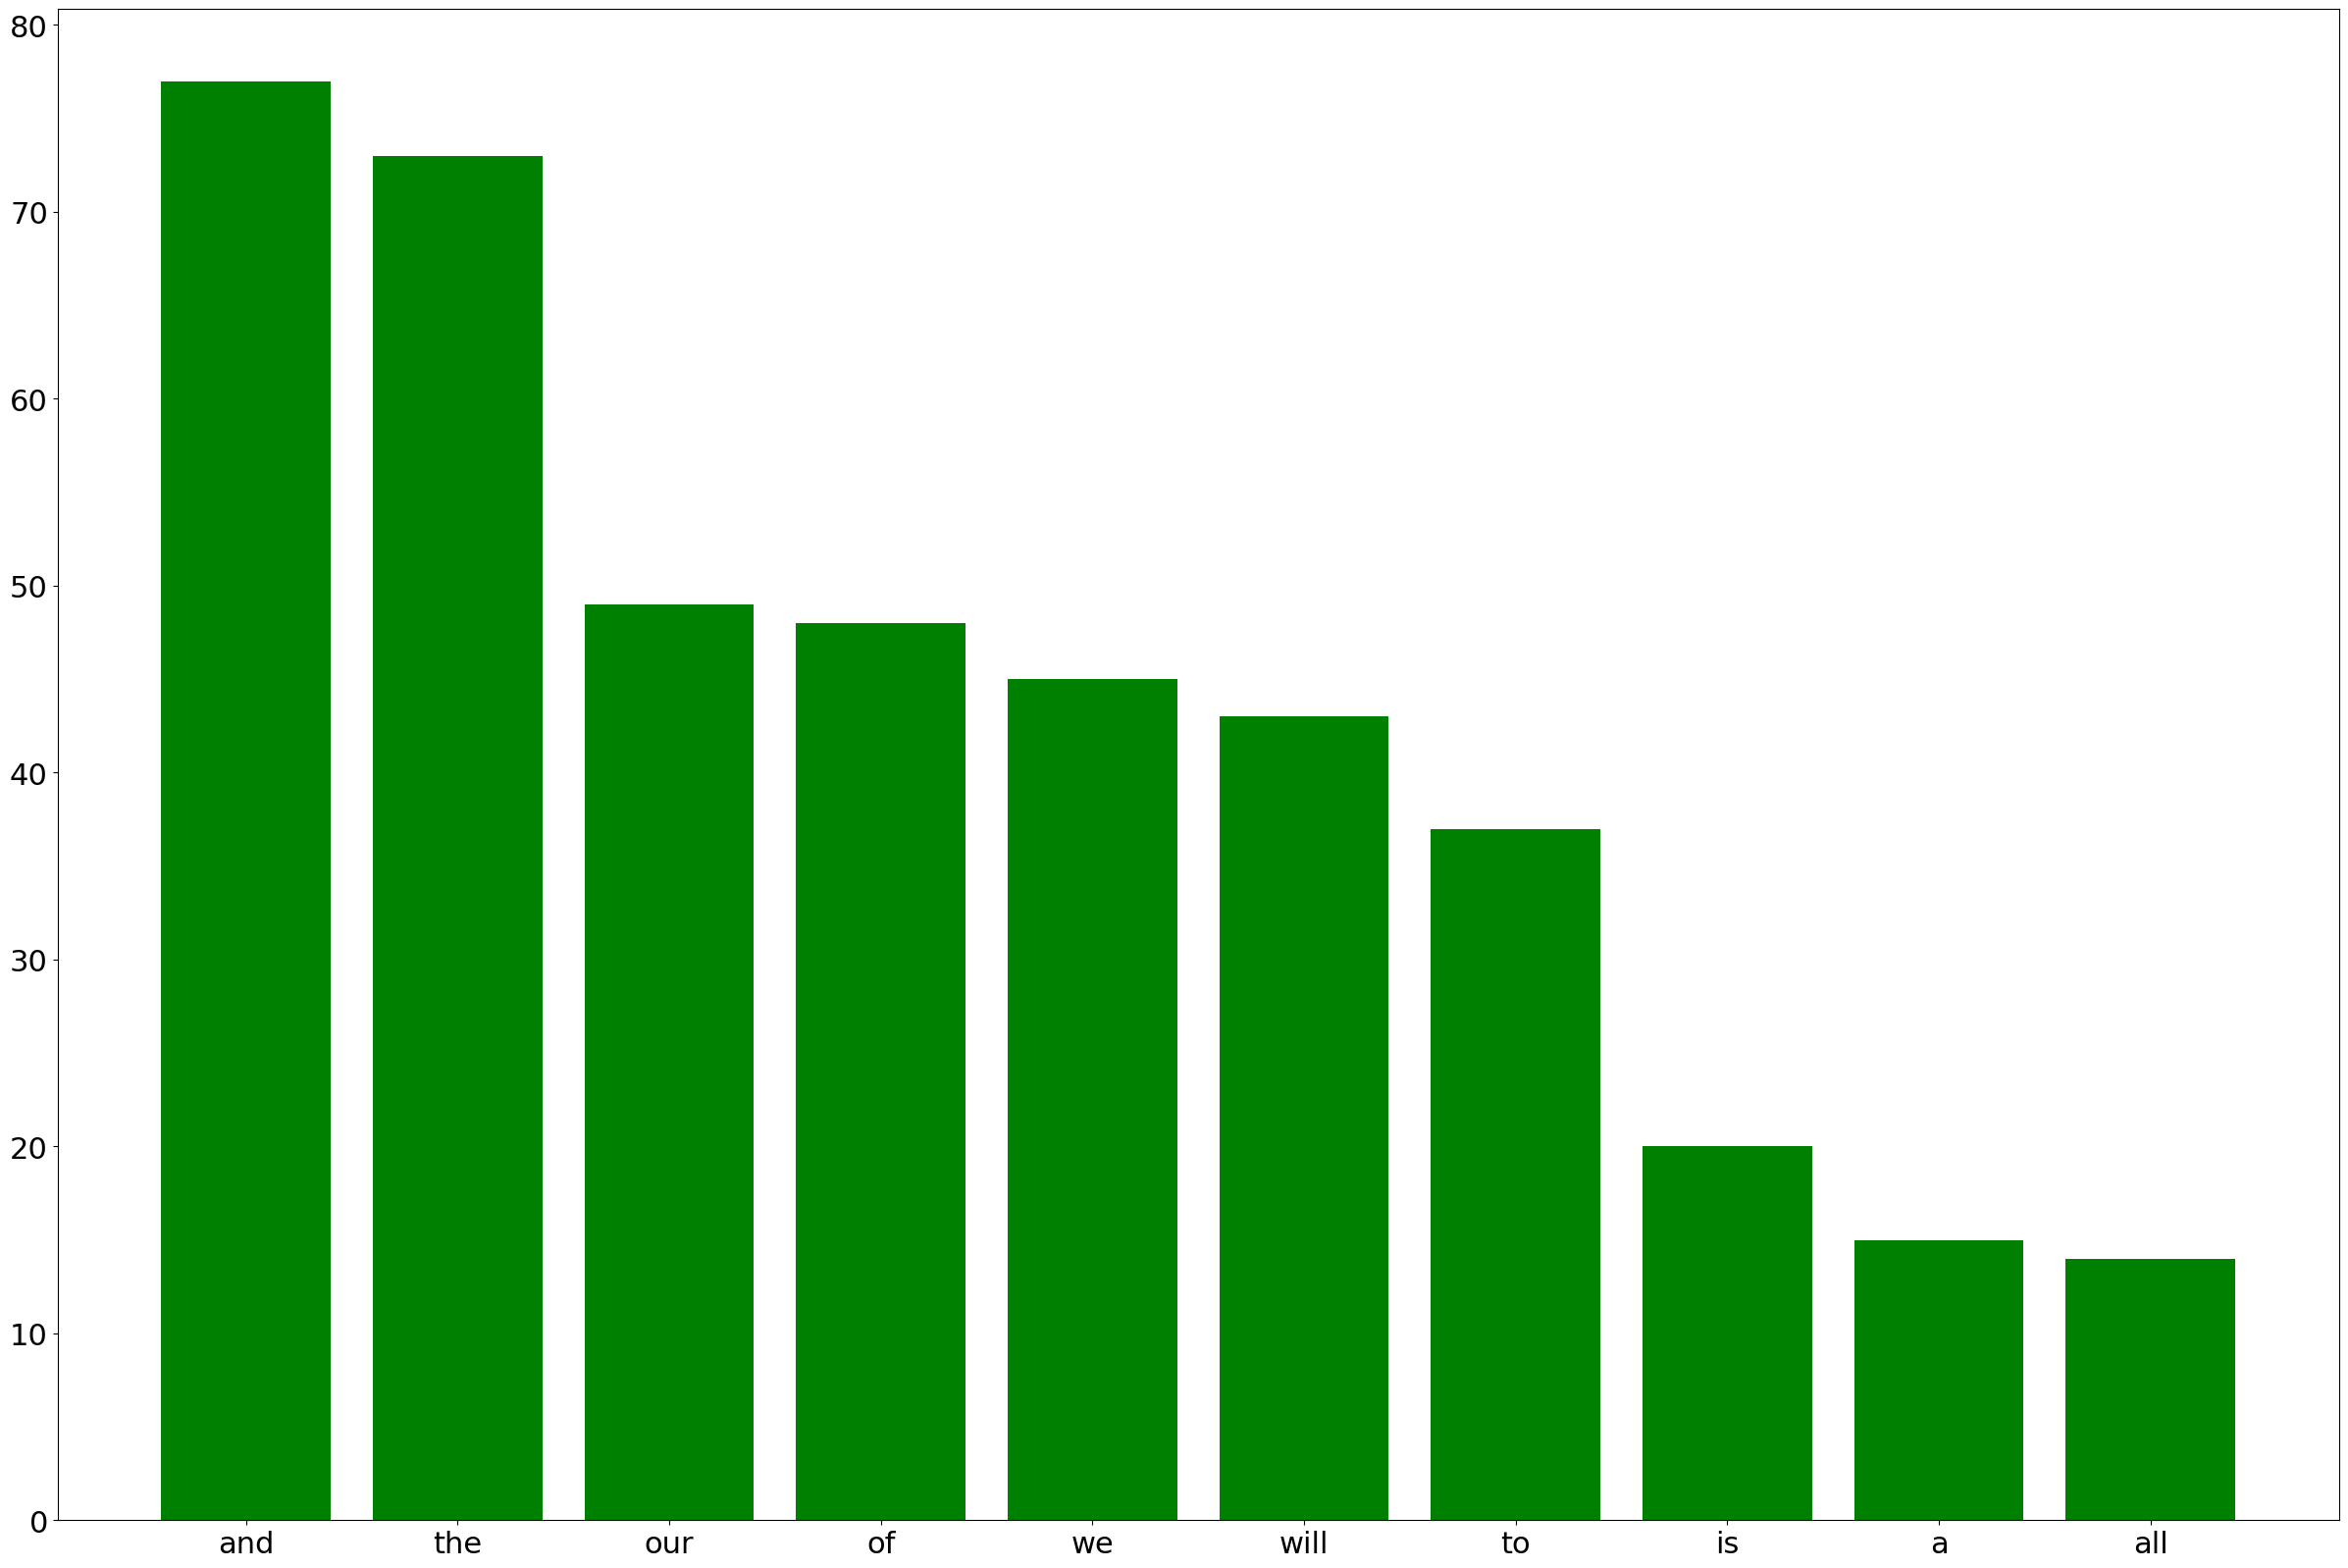

In [22]:
# Draw bar chart for the top n words, with stopwords
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20)) 
plt.rcParams.update({'font.size': 22})
df = pd.DataFrame({'words': words})
df['frequency'] = 1
# group rows by words, count the frequencies in each group
# and sort by frequencies
df = df.groupby('words').sum().sort_values('frequency', ascending=False)
# draw the top n frequent words
ndf = df.head(10)
plt.bar(ndf.index, ndf.frequency, width=0.8, color='g')

<BarContainer object of 10 artists>

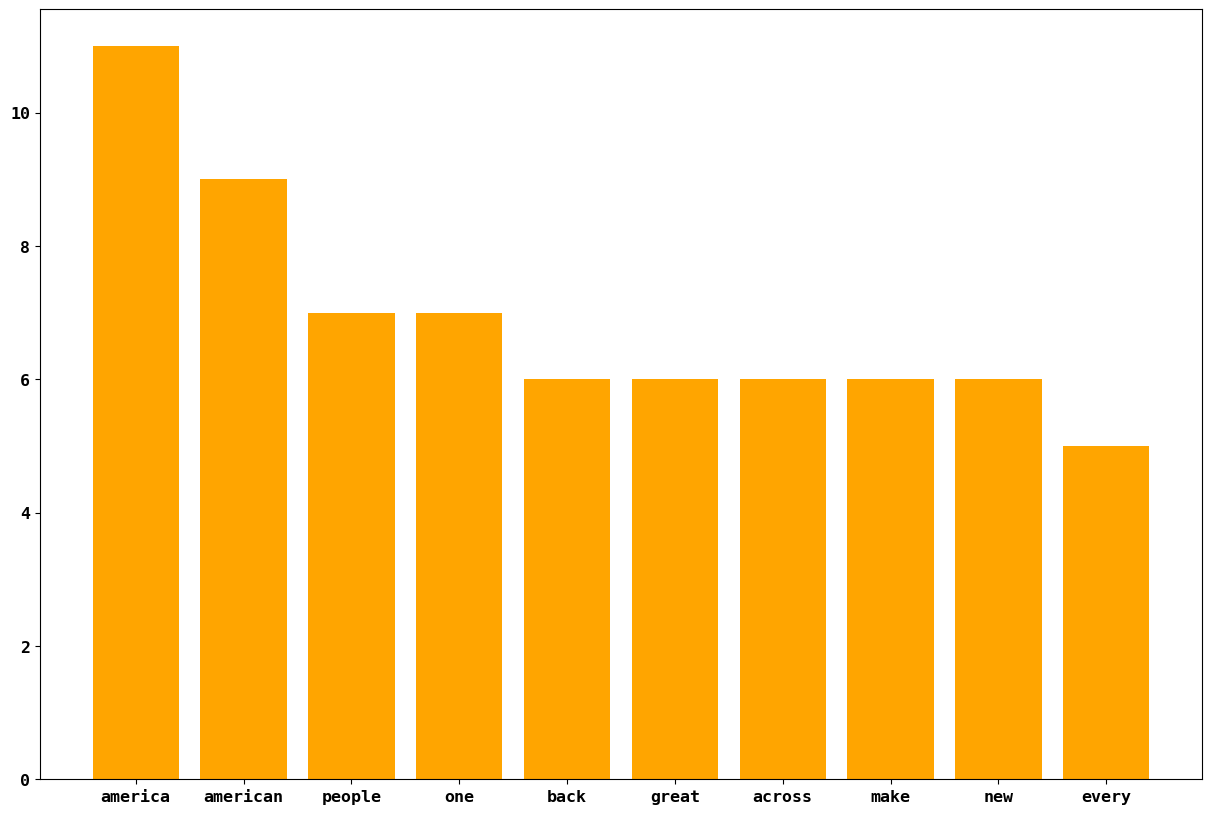

In [23]:
# Draw bar chart for the top n words, without stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
df = pd.DataFrame({'words': removeStopWords(words, stopwords)})
df['frequency'] = 1
# group rows by words, count the frequencies in each group
# and sort by frequencies
df = df.groupby('words').sum().sort_values('frequency', ascending=False)
# draw the top n frequent words
ndf = df.head(10)
# increase width of figure (so we can see the words clearly) and change font size
plt.figure(figsize=(15,10))
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

plt.bar(ndf.index, ndf.frequency, width=0.8, color='orange')

##  <span style="color:red"> Excercise 1 ( 4 pts)</span>
1. Use the NLTK book corpus (`from nltk.corpus import inaugural`) to analyze the `Inaugural Address Corpus`. Which words are frequent for all inaugural address speech over time (since 1789)? For example if we compare the two words `america` and `citizen` with the list `[4,1,1,4]` and `[3,2,2,3]` respectively, we can tell that  `citizen` is more popular as it in average occurs more often each year. Draw a diagram which shows the frequency of the top 10 words over time. `inaugural.fileids()` will list all the inaugural texts. `inaugural.raw(fileids=inaugural.fileids()[0])` will give you the raw text for the first speech. Do not use the NLTK built-in methods.
1. Improve the `getNgrams` function so that it will return also the frequencies of each n-grams in the range `1-->N` (sorted in descending order). Try to generate n-grams from 2-4 excluding unigrams (inclusive 2 and 4)?

### Example
The lazy dog jumps  123 <br>
The lazy dog 320 <br>
The lazy 589 <br>
...

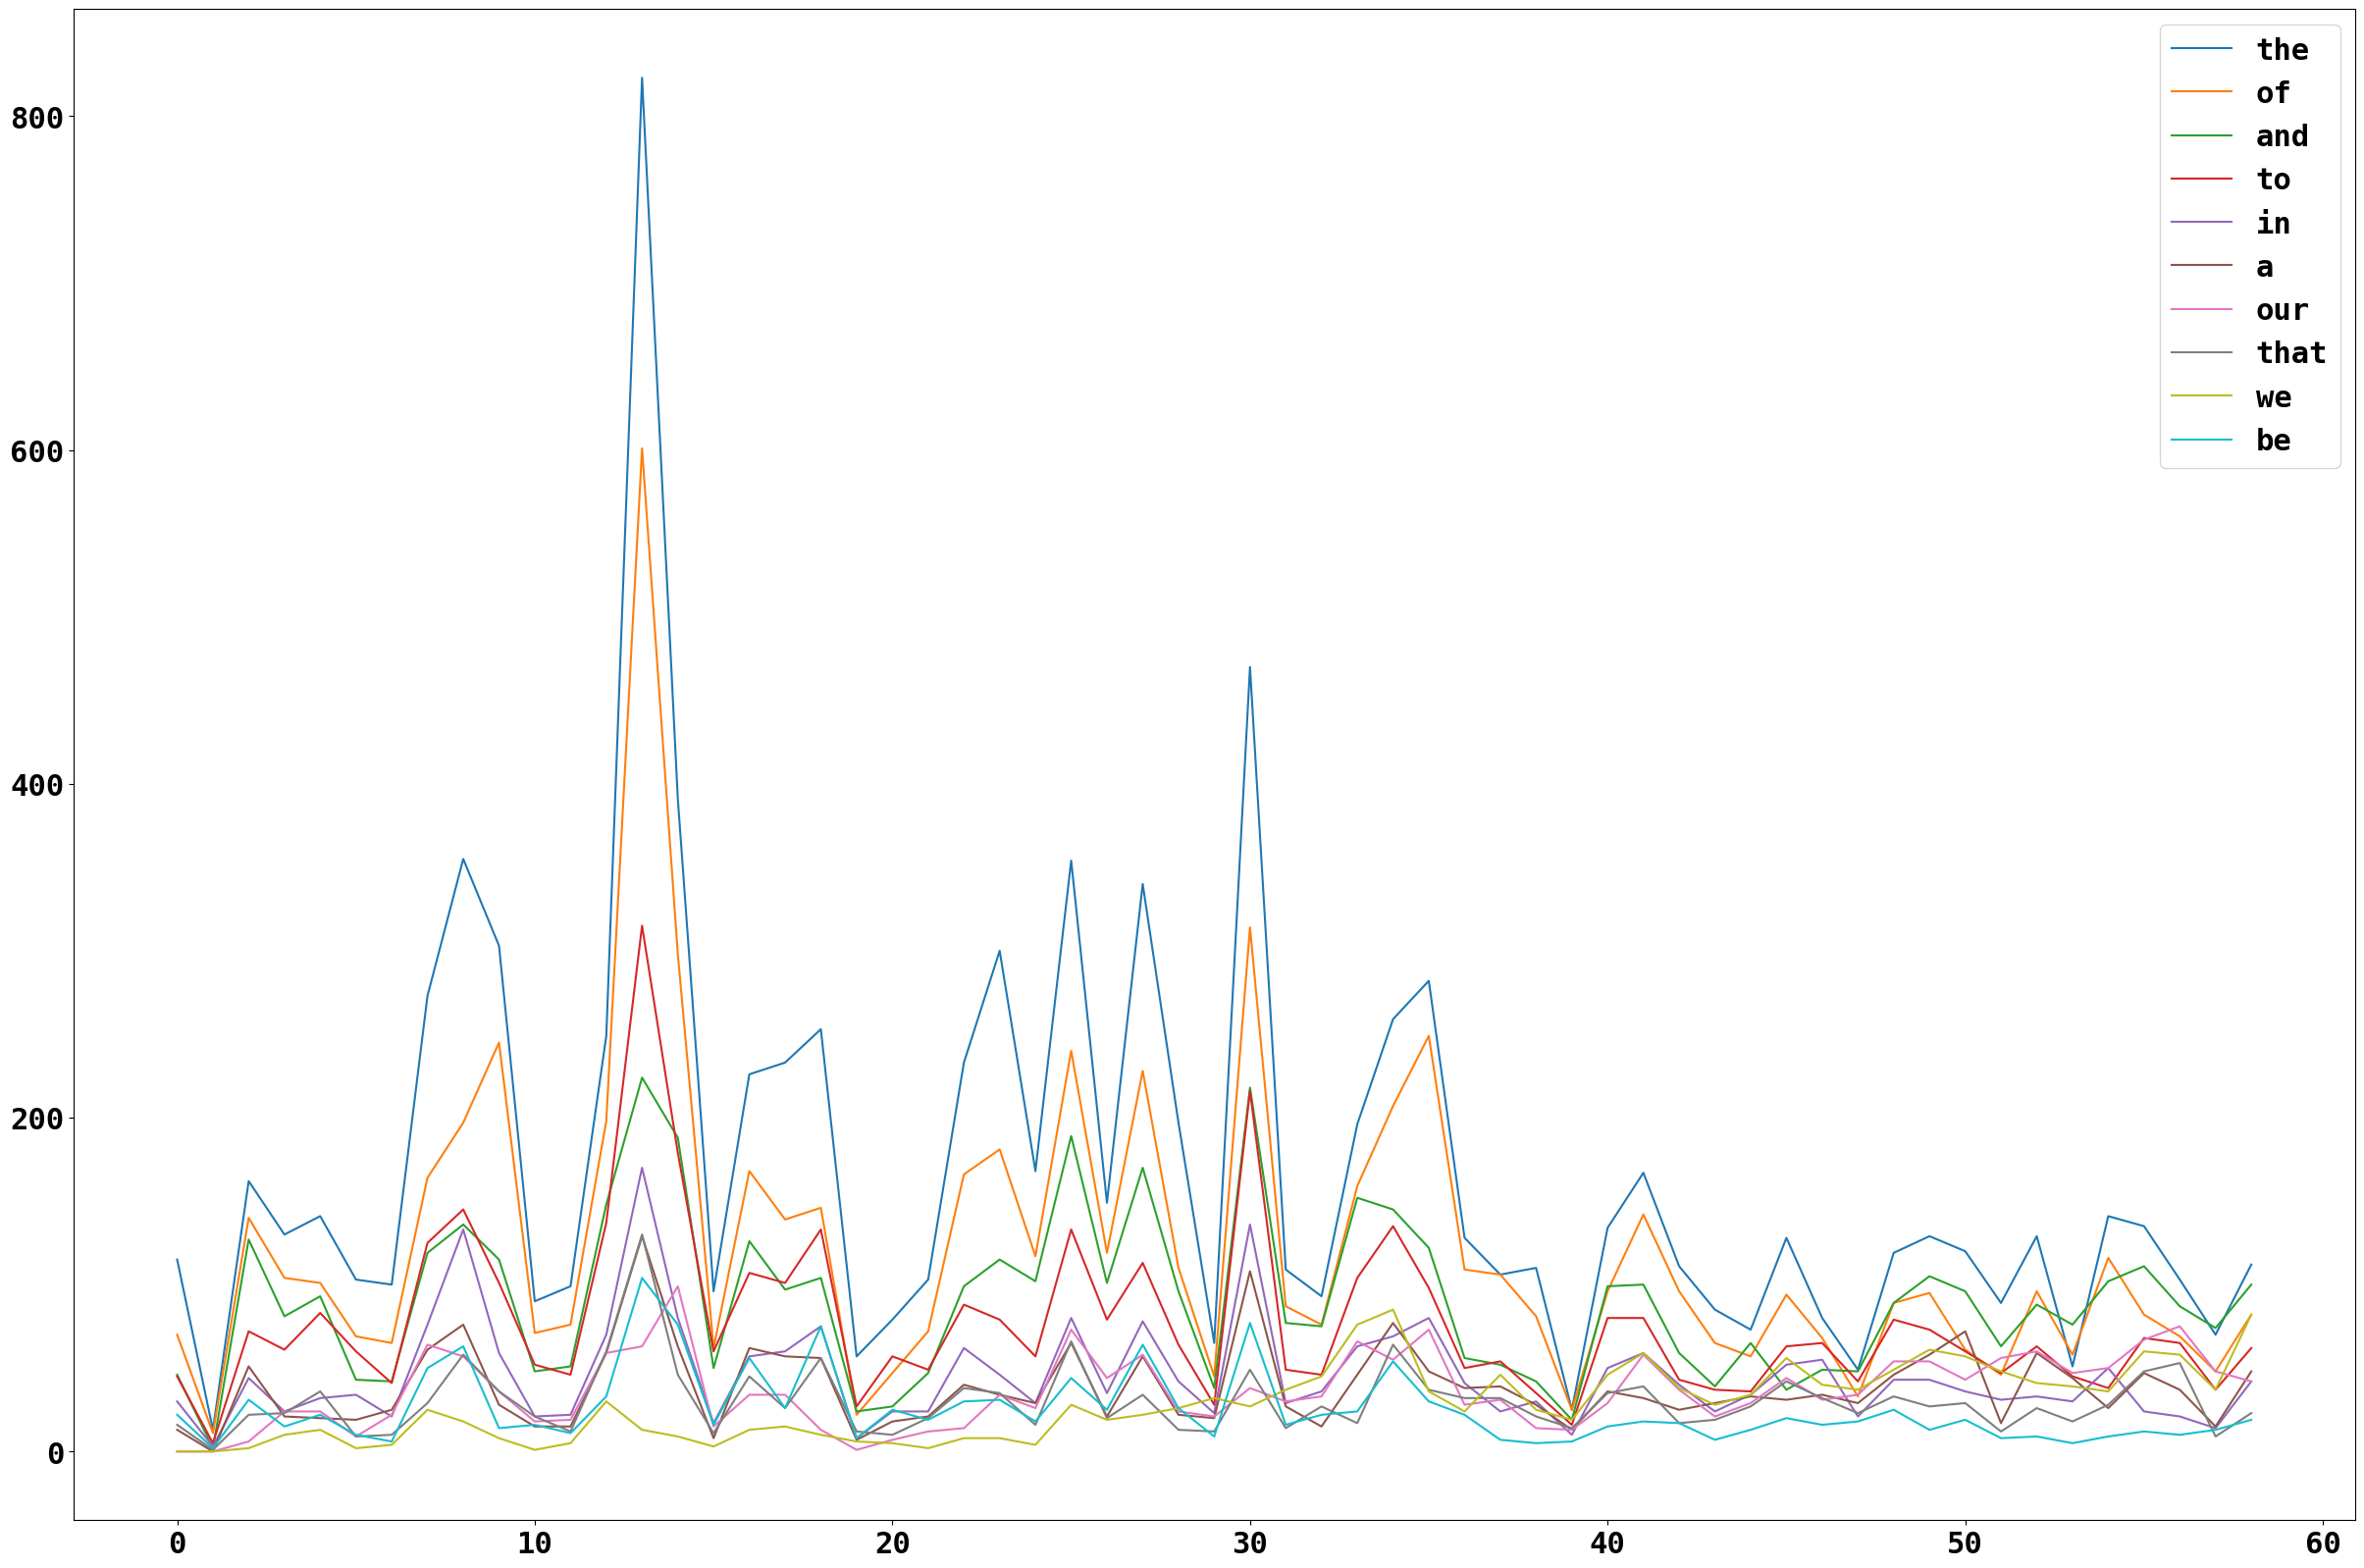

[115, 13, 162, 130, 141, 103, 100, 273, 355, 303, 90, 99, 249, 823, 391, 96, 226, 233, 253, 57, 79, 103, 233, 300, 168, 354, 149, 340, 197, 65, 470, 109, 93, 196, 259, 282, 128, 106, 110, 25, 134, 167, 111, 85, 73, 128, 80, 49, 119, 129, 120, 89, 129, 51, 141, 135, 103, 70, 112]


In [78]:
from nltk.corpus import inaugural
freq = {}
total = {}
i = 0
while i < len(inaugural.fileids()):
    text = inaugural.raw(fileids=inaugural.fileids()[i])
    words = [word for word in text.lower().split(" ") if word != ""]
    for word in words:
        if word in freq:
            freq[word][i] += 1
            total[word] += 1
        else: 
            freq[word] = [0]*len(inaugural.fileids())
            total[word] = 1
    i += 1
fdist = FreqDist(total)

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20)) 
plt.rcParams.update({'font.size': 22})
for word, _ in fdist.most_common(10):
    plt.plot(freq[word], label = word)
plt.legend()
plt.show()

    
    
    

In [130]:
def getNgrams(text, n):
    freq = {}
    # lowercase the text
    text = text.lower()
    # create words from the text
    words = [word for word in text.split(" ") if word != ""]
    ngrams = zip(*[words[i:] for i in range(n)])
    ngrams = {" ".join(ngram): 0 for ngram in ngrams}
    for n in ngrams:
        ngrams[n] += text.count(n)
    return dict(sorted(ngrams.items(), key=lambda item: item[1], reverse=True))

In [131]:
getNgrams(inaugural.raw(fileids=inaugural.fileids()[0]),2)

{'of the': 23,
 'to the': 14,
 'in the': 11,
 'or the': 9,
 'which the': 8,
 'by the': 8,
 'which i': 7,
 'for the': 7,
 'and the': 7,
 'on the': 6,
 'of a': 6,
 'at the': 6,
 'of my': 5,
 'my country': 5,
 'ought to': 5,
 'have been': 5,
 'that the': 5,
 'on a': 5,
 'and a': 5,
 'that i': 5,
 'the present': 4,
 'to be': 4,
 'i have': 4,
 'will be': 4,
 'in which': 4,
 'the public': 4,
 'of an': 4,
 'on which': 4,
 'with the': 3,
 'as the': 3,
 'citizens a': 3,
 'all i': 3,
 'by which': 3,
 'by a': 3,
 'under which': 3,
 'the character': 3,
 'of their': 3,
 'with a': 3,
 'may be': 3,
 'to you': 3,
 'and of': 2,
 'the house': 2,
 'house of': 2,
 'than that': 2,
 'of which': 2,
 'i was': 2,
 'by my': 2,
 'my country,': 2,
 'can never': 2,
 'from a': 2,
 'a retreat': 2,
 'retreat which': 2,
 'in my': 2,
 'with an': 2,
 'as well': 2,
 'well as': 2,
 'to which': 2,
 'be peculiarly': 2,
 'in this': 2,
 'i dare': 2,
 'is that': 2,
 'that it': 2,
 'has been': 2,
 'my duty': 2,
 'of every': 2,


In [132]:
getNgrams(inaugural.raw(fileids=inaugural.fileids()[0]),3)

{'in which i': 3,
 'the house of': 2,
 'of which the': 2,
 'of the present': 2,
 'a retreat which': 2,
 'as well as': 2,
 'of my country': 2,
 'ought to be': 2,
 'all i dare': 2,
 'of my fellow': 2,
 'by my country': 2,
 'under which i': 2,
 'of the united': 2,
 'the united states': 2,
 'to the great': 2,
 'i assure myself': 2,
 'assure myself that': 2,
 'my fellow citizens': 2,
 'the executive department': 2,
 'which ought to': 2,
 'the public good': 2,
 'the american people': 2,
 'fellow-citizens of the': 1,
 'of the senate': 1,
 'the senate and': 1,
 'senate and of': 1,
 'and of the': 1,
 'of the house': 1,
 'house of representatives:\n\namong': 1,
 'of representatives:\n\namong the': 1,
 'representatives:\n\namong the vicissitudes': 1,
 'the vicissitudes incident': 1,
 'vicissitudes incident to': 1,
 'incident to life': 1,
 'to life no': 1,
 'life no event': 1,
 'no event could': 1,
 'event could have': 1,
 'could have filled': 1,
 'have filled me': 1,
 'filled me with': 1,
 'me wi

In [133]:
getNgrams(inaugural.raw(fileids=inaugural.fileids()[0]),4)

{'of the united states': 2,
 'i assure myself that': 2,
 'of my fellow citizens': 2,
 'fellow-citizens of the senate': 1,
 'of the senate and': 1,
 'the senate and of': 1,
 'senate and of the': 1,
 'and of the house': 1,
 'of the house of': 1,
 'the house of representatives:\n\namong': 1,
 'house of representatives:\n\namong the': 1,
 'of representatives:\n\namong the vicissitudes': 1,
 'representatives:\n\namong the vicissitudes incident': 1,
 'the vicissitudes incident to': 1,
 'vicissitudes incident to life': 1,
 'incident to life no': 1,
 'to life no event': 1,
 'life no event could': 1,
 'no event could have': 1,
 'event could have filled': 1,
 'could have filled me': 1,
 'have filled me with': 1,
 'filled me with greater': 1,
 'me with greater anxieties': 1,
 'with greater anxieties than': 1,
 'greater anxieties than that': 1,
 'anxieties than that of': 1,
 'than that of which': 1,
 'that of which the': 1,
 'of which the notification': 1,
 'which the notification was': 1,
 'the n

## <span style="color:blue">Word Similarity</span>
NLTK provides a simple text similarity function that shows which words are used in a similar context

In [24]:
# Show text concordance for the word "frightened"
text1.concordance('frightened')

Displaying 6 of 6 matches:
t , and was fast asleep . But the frightened master comes to him , and shrieks
nd never came to good . He got so frightened about his plaguy soul , that he s
 says he . Slid ! man , but I was frightened . Such a phiz ! But , somehow , n
aking of that buffalo robe to the frightened colt ! Though neither knows where
ndostan coast with a deck load of frightened horses , careens , buries , rolls
st - sou - east , sir ," said the frightened steersman . " Thou liest !" smiti


In [25]:
# show words that are used in a similar cotntext as "frightened"
text1.similar("frightened")

silent wild racing


In [26]:
text1.concordance('racing')

Displaying 1 of 1 matches:
nail - stubbs of the steel shoes of racing horses ." " Horse - shoe stubbs , s


## <span style="color:blue">Dispersion plot</span>
The  <span style="color:blue">dispersion plot</span> is helpful to determine the location of a word in a sequence of text sentences. It shows the spread of any particular word across the whole text. In the plot, the x axis represents the <span style="color:blue">narrative time </span> measured by the number of words in the text. Also, when the desired word appears in the text a black vertical line is plotted, otherwise it remains blank (white line).

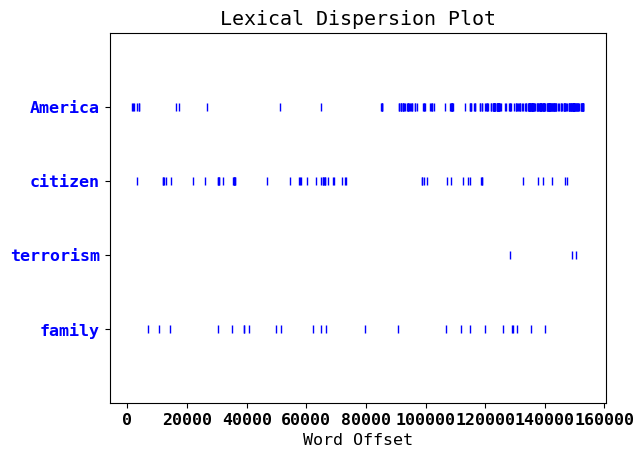

In [27]:
text4.dispersion_plot(['America', 'citizen', 'terrorism', 'family'])

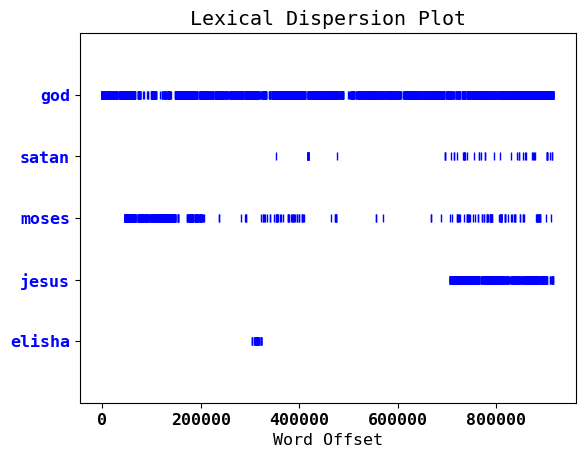

In [28]:
# Dispersion plot from bible text
lines = []
with open("data/kjvdat.txt",'r') as bib_file:
    for line in bib_file:
        lines.append(line.split('| ')[1][:-2])

bib_tokens = nltk.word_tokenize(' '.join(lines).lower())
bib_text = nltk.Text(bib_tokens)
bib_text.dispersion_plot(['god', 'satan', 'moses', 'jesus', 'elisha'])

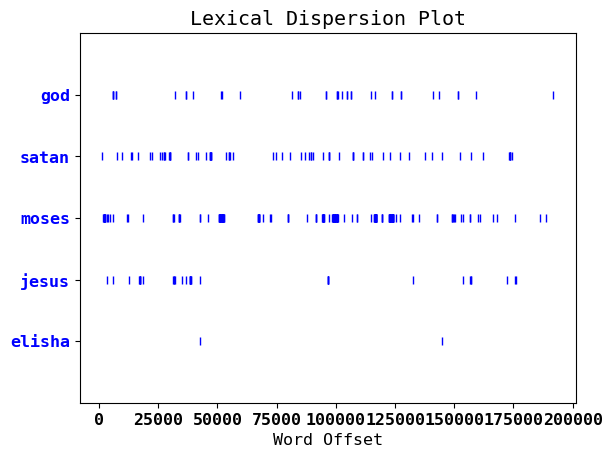

In [29]:
# Dispersion plot from quran text
lines = []
with open("data/en.sahih.txt",'r') as qur_file:
    for line in qur_file:
        lines.append(line.split('|')[2])

qur_tokens = nltk.word_tokenize(' '.join(lines).lower())
qur_text = nltk.Text(qur_tokens)
qur_text.dispersion_plot(['god', 'satan', 'moses', 'jesus', 'elisha'])

## <span style="color:blue">Word clouds</span>
Word cloud or tag cloud represents the frequency or importance of each word in a corpus.

In [30]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-macosx_10_9_x86_64.whl (160 kB)


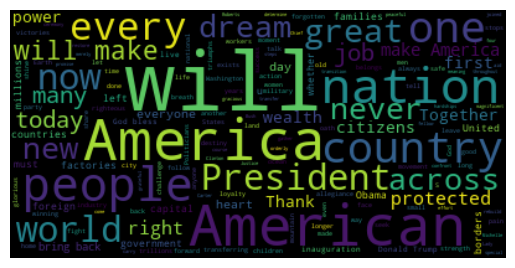

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud().generate(content)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# get the german stopwords from NLTK
from nltk.corpus import stopwords
stopwords = stopwords.words('german')
content = open("data/deu.txt").read()
words = content.split(" ")
cleanwords = removeStopWords(words, stopwords)

freqdict = freqDict(cleanwords)
# Build a dictionary of word:frequency pairs
d ={}
for word in sortDict(freqdict):
    d[word[1]] =word[0]
wordcloud = WordCloud()
# Create Word cloud from dictionaries based on frequencies
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: text length is undefined for text rotated by 90 or 270 degrees

## Introduction to Numpy and Pandas
## <span style="color:blue">Numpy</span>
Numpy provides math and data manipulations using an ndarray (n dimensional array) objects.

In [135]:
# create numpy array 
import numpy as np
list1 = [0,1,2,3,4]
listnp = np.array(list1)
print(listnp)
print("types of listnp:",type(listnp))

[0 1 2 3 4]
types of listnp: <class 'numpy.ndarray'>


In [136]:
# add 2 to each memebrs of the array
listnp +=  2
print(listnp)

[2 3 4 5 6]


In [137]:
# Create a 2d array from a list of lists
list2 = [[0,1,2], [3,4,5], [6,7,8]]
listnp2 = np.array(list2)
print(listnp2)
print("shapes:",listnp2.shape)
print("dimesnion:",listnp2.ndim)
print("total number of items:",listnp2.size)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
shapes: (3, 3)
dimesnion: 2
total number of items: 9


In [138]:
print("all:",listnp2)
# Extract the first 2 rows and columns
print("first 2:",listnp2[:2, :2])

all: [[0 1 2]
 [3 4 5]
 [6 7 8]]
first 2: [[0 1]
 [3 4]]


In [139]:
# Reverse only the row positions
listnp2[::-1, ]

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

In [140]:
# Reverse the row and column positions
listnp2[::-1, ::-1]

array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

In [141]:
# mean, max and min
print("Mean value is: ", listnp2.mean())
print("Max value is: ", listnp2.max())
print("Min value is: ", listnp2.min())
# Row wise and column wise min
print("Column wise minimum: ", np.amin(listnp2, axis=0))
print("Row wise minimum: ", np.amin(listnp2, axis=1))

Mean value is:  4.0
Max value is:  8
Min value is:  0
Column wise minimum:  [0 1 2]
Row wise minimum:  [0 3 6]


In [142]:
# Add new row
newrow = [9,10,11]
listnp3 = np.vstack([listnp2, newrow])
print (listnp3)
print (listnp3.shape)
# Reshape a 4x4 array to 3x4 array
print(listnp3.reshape(3, 4))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
(4, 3)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [143]:
# create 0 to 4 (size of 5)
print(np.arange(5))  
# 0 to 9
print(np.arange(0, 10))  
# 0 to 9 with step of 2
print(np.arange(0, 10, 2))  
# 10 to 1, decreasing order
print(np.arange(10, 0, -1))

[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[10  9  8  7  6  5  4  3  2  1]


In [144]:
# arry of zeros
print(np.zeros([2,2]))

# array of one
print(np.ones([2,2,3]))

[[0. 0.]
 [0. 0.]]
[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]


In [145]:
# Random numbers between [0,1) of shape 2,2
print("1.", np.random.rand(2,2))
# Normal distribution with mean=0 and variance=1 of shape 2,2
print("2.", np.random.randn(2,2))
# Random integers between [0, 10) of shape 2,2
print("3.", np.random.randint(0, 10, size=[2,2]))
# One random number between [0,1)
print("4.", np.random.random())
# Random numbers between [0,1) of shape 2,2
print("5.", np.random.random(size=[2,2])) # same as np.random.rand(2,2)
# Pick 10 items from a given list, with equal probability
print("6.", np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10))  
# Pick 10 items from a given list with a predefined probability 'p'
print("7.", np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1]))

1. [[0.40402997 0.30644418]
 [0.84487663 0.02527422]]
2. [[-0.34765072  0.72308126]
 [-0.70010304 -2.77997231]]
3. [[9 6]
 [1 9]]
4. 0.08262486358147969
5. [[0.41819432 0.56144517]
 [0.70671218 0.81516078]]
6. ['u' 'i' 'i' 'u' 'u' 'u' 'o' 'o' 'a' 'a']
7. ['o' 'o' 'a' 'o' 'a' 'u' 'a' 'a' 'o' 'i']


In [146]:

## Set the random seed == same random nubers will be generated if the process repeated
np.random.seed(100)
# Create random integers of size 10 between [0,10)
listnp4 = np.random.randint(0, 10, size=10)
print(listnp4)

[8 8 3 7 7 0 4 2 5 2]


In [147]:
# concatenating columnwise
a = np.zeros([4, 4])
b = np.ones([4, 4])
# Vertical Stack Equivalents (Row wise)
print("using concatenate", np.concatenate([a, b], axis=0))
print("using vstack",np.vstack([a,b]))
np.r_[a,b]  # concatenation along the first axis.

using concatenate [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
using vstack [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [148]:
# Coliumn wise stacking
print("using concatenate",np.concatenate([a, b], axis=1))
print("using vstack", np.hstack([a,b]))
np.c_[a,b]

using concatenate [[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]
using vstack [[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]


array([[0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.]])

In [149]:
# Import data from csv file (url)
path = 'https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv'
data = np.genfromtxt(path, delimiter=',', dtype='f, d, f, f, f, f, d, d, U50', names=True)
print("Headers:",data.dtype.names)
data[:3]  # see first 3 rows

Headers: ('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name')


array([(18., 8., 307., 130., 3504., 12. , 70., 1., '"chevrolet chevelle malibu"'),
       (15., 8., 350., 165., 3693., 11.5, 70., 1., '"buick skylark 320"'),
       (18., 8., 318., 150., 3436., 11. , 70., 1., '"plymouth satellite"')],
      dtype=[('mpg', '<f4'), ('cylinders', '<f8'), ('displacement', '<f4'), ('horsepower', '<f4'), ('weight', '<f4'), ('acceleration', '<f4'), ('year', '<f8'), ('origin', '<f8'), ('name', '<U50')])

In [150]:
# Save the array as a csv file
with open('data/Auto_out.csv', 'wb') as f:
    np.savetxt(f, data, delimiter=",", header=','.join(data.dtype.names), fmt='%s')

##  Text to vector - one-hot encoding
One hot encoding convert categorical data to a numeric value. For example, if you have the category as "cat dog mouse" This can be represented as `[1 0 0] [0 1 0] [0 0 1]` where the first index is for cat and the last for mouse.

In [151]:
# change texts to a one hot encoding
sent = "Can I eat the Pizza? said the man".lower()
words = set(sent.split())
word_indexs = {}
for i, word in enumerate(words):
        word_indexs[word] = i
print(word_indexs)
word_vectors = [word_indexs[word] for word in sent.split()]
one_hot_encodings = np.eye(len(words))[word_vectors]
print(one_hot_encodings)

{'i': 0, 'eat': 1, 'the': 2, 'said': 3, 'can': 4, 'pizza?': 5, 'man': 6}
[[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [152]:
# compute sentence similarity
sent1 = "I love Pizza" # [1 1 1 0] vocabs = I, love, pizza, hate , Here hate is absent hence 0
sent2 = "I hate Pizza" # [1 0 1 1 1]
vec1 = np.array([1, 1, 1, 0])
vec2 = np.array([1, 0, 1, 1])
print("similarity=", np.round(np.dot(vec1,vec2) / (np.sqrt(np.dot(vec1,vec1)) + np.sqrt(np.dot(vec2,vec2))), 2))

similarity= 0.58


##  <span style="color:red"> Excercise 2 ( 6 pts)</span>
1.  Write a program that will produce one-hot encoding for sentences in a large corpus (use the NLTK books corpus). Before computing the one-hot encoding of sentences 1) remove stop words (you can use the builtin stopwords list in NLTK), and 2) compute the total number of unique words that is used to compute the size of the one-hot encoding vectors.
1. Using the one-hot encoding, write a program that is used to find the most similar sentence for a given input sentence. How do you handle out-of-vocabulary words in the input sentences, i.e if the input sentence contains words that do not occur while training the one-hot encoding?

In [3]:
import numpy as np
from nltk.book import *
from nltk.corpus import stopwords


def removeStopWords(words, stopwords):
    return [word.lower() for word in words if word.lower() not in stopwords]

In [21]:
# 2.1
# Remove stop words
stop_words = set(stopwords.words('english'))
sentences = gutenberg.sents("melville-moby_dick.txt")
sentences = [removeStopWords(sentence, stop_words) for sentence in sentences]
# Compute the total number of unique words
unique_words = list(set(word for sentence in sentences for word in sentence))
word_idx = {word: idx for idx, word in enumerate(unique_words)}
print("Total number of unique words:", len(unique_words))

Total number of unique words: 17079


In [28]:
# 2.2
# Compute the one-hot encoding for each sentence
one_hot_encodings = []
for sentence in sentences:
    one_hot_encoding = np.zeros(len(unique_words))
    for word in sentence:
        one_hot_encoding[word_idx[word]] = 1
    one_hot_encodings.append(one_hot_encoding)
# Enter a sentence and one-hot encode it, ignore out-of-vocabulary words
input_sentence = input("Enter a sentence: ")
input_sentence = removeStopWords(input_sentence.split(), stop_words)
input_one_hot_encoding = np.zeros(len(unique_words))
for word in input_sentence:
    if word in word_idx:
        input_one_hot_encoding[word_idx[word]] = 1
    else:
        print("Out-of-vocabulary word:", word)
# Calculate the most similar sentence
most_similar_sentence = sentences[0]
most_similar_sentence_one_hot_encoding = one_hot_encodings[0]
most_similar_sentence_score = np.dot(input_one_hot_encoding, most_similar_sentence_one_hot_encoding)
for i in range(1, len(sentences)):
    sentence = sentences[i]
    sentence_one_hot_encoding = one_hot_encodings[i]
    sentence_score = np.dot(input_one_hot_encoding, sentence_one_hot_encoding)
    if sentence_score > most_similar_sentence_score:
        most_similar_sentence = sentence
        most_similar_sentence_one_hot_encoding = sentence_one_hot_encoding
        most_similar_sentence_score = sentence_score
print("Most similar sentence:", " ".join(most_similar_sentence))

Most similar sentence: grinning landlord , well boarders , seemed amazingly tickled sudden friendship sprung queequeg -- especially peter coffin ' cock bull stories previously much alarmed concerning person companied .


## Reading and plotting using <span class="girk">pandas and Seaborn</span>

In [ ]:
# Read the auto_csv file we wrote to the file system earlier
import pandas as pd
df = pd.read_csv("data/Auto_out.csv")
df

In [ ]:
!pip install cufflinks --upgrade

In [ ]:
# A productivity tool that binds pandas and plotly.
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['horsepower'].iplot(
    kind='hist',
    bins=50,
    xTitle='HP',
    linecolor='black',
    yTitle='count',
    title='HP distribution')

In [ ]:
!pip install seaborn

# Vizualization of the `Predicting Upvotes` Dataset 
An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

See details [here](https://github.com/lawrence2269/Upvotes)

|Variable|	Definition|
| :--- | :--- |
|ID |	Question ID |
|Tag |	Anonymised tags representing question category|
|Reputation	| Reputation score of question author|
|Answers	| Number of times question has been answered|
|Username |	Anonymised user id of question author|
|Views |	Number of times question has been viewed|
|Upvotes	 | (Target) Number of upvotes for the question|


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [ ]:
# Use the 'Predict Number of Upvotes' dataset: 
# https://datahack.analyticsvidhya.com/contest/enigma-codefest-machine-learning-1/
#It deals with problem of predicting the upvote count for a queries posted and identify 
# the parameters that affect it the most.
df = pd.read_csv("data/train_upvotes.csv")
df.head()

In [ ]:
#scatter plot to show relationship between views and upvotes
sns.relplot(x="Views", y="Upvotes", data = df)

In [ ]:
# See the tag associated with the data with a color attached to the points
sns.relplot(x="Views", y="Upvotes", hue = "Tag", data = df)


In [ ]:
sns.relplot(x="Views", y="Upvotes", hue = "Answers", data = df);

In [ ]:
# Food servers's tips in a restuarant, which factor is important?..
tips = sns.load_dataset("tips")
tips

In [ ]:
#visualize a linear relationship as determined through regression using the regplot and lmplot functions
sns.regplot(x="total_bill", y="tip", data=tips);

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips);

In [ ]:
# Categorical onto a FaceGrid
sns.catplot(x="sex", y="tip", jitter = False, data=tips)

In [ ]:
sns.catplot(x="sex", y="total_bill", jitter = False, data=tips)

In [ ]:
sns.catplot(x="time", y="tip", jitter = False, data=tips)

In [ ]:
sns.catplot(x="smoker", y="total_bill", jitter = False, data=tips)

## <span style="color:blue">Heat Map</span>
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

You can use sequential color palettes which are suited to ordered data that progress from low to high (gradient). The palettes names are : Blues, BuGn, BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu YlOrBr, YlOrRd.
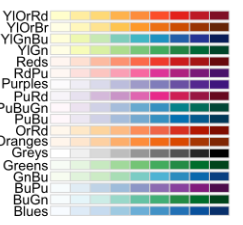

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame([[10, 20, 30, 40], [7, 14, 21, 28], [55, 15, 8, 12],
                    [15, 14, 1, 8]],
                  columns=['Apple', 'Orange', 'Banana', 'Pear'],
                  index=['Grp1', 'Grp2', 'Grp3', 'Grp4']
                  )
plt.imshow(df, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(df)),df.columns, rotation=20)
plt.yticks(range(len(df)),df.index)
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
 
# Create a sample dataset 
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
# plot using a color palette
#chose one of them below
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
plt.show()

## Resources
* [Text concordance](https://orange3-text.readthedocs.io/en/latest/widgets/concordance.html)
* [Data Analysis and Visualization for Text Data](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)
* [Heatmap Seaborn](https://likegeeks.com/seaborn-heatmap-tutorial/)
* [Heatmap Seaborn 2](https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-2/)
* [Word cloud](https://www.datacamp.com/community/tutorials/wordcloud-python)
* [Word Cloud 2](https://www.datacamp.com/community/tutorials/wordcloud-python)
* [Word Frequencies](https://programminghistorian.org/en/lessons/counting-frequencies)
* [Seaborn](https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/)
* [seaborn tutorial](https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/)